In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve,average_precision_score


from test import Gesture_Detection
from process2 import Gesture_Data
from utity import cal_IoU


In [2]:


class Gesture_validation():
    def __init__(self,model,data,windows_size,iou_threshold=0.8,hit_threshold=5) -> None:
        self.model = model
        self.data = data
        self.windows_size = windows_size
        self.iou_threshold = iou_threshold
        self.hit_threshold = hit_threshold

        self.predict_data = list()
        self.g_class_list = None
    
    def _predicted_condition(self,data,threshold,debug=False) -> bool:
        
        if data['hm_max_value'] > threshold and data['iou'] > self.iou_threshold:
            if debug:
                print(data['hm_max_value'],data['iou'],data['hm_max'] > self.threshold , data['iou'] > self.iou_threshold,data['hm_max_value'] > self.threshold and data['iou'] > self.iou_threshold)
            return True
        else:
            return False

    def gen_test(self):

        for i in range(self.data.get_accomplish_path_total()):
            print(i)
#             g_data , g_label ,g_truth , g_class_list,g_class_name = self.data.generate_test_data(i)
            test_data = self.data.generate_test_data(i)
            g_data = test_data['raw_data']
            g_label = test_data['label']
            total_g_label = len(g_label)
            g_truth = test_data['ground_truth']
            g_truth_class = test_data['ground_truth_class']
            
            print(g_label)
            
            tem = list()
            for j in range(0,len(g_data)-self.windows_size):
                g_p = np.array(g_data[j:j+self.windows_size]) 
                g_t = np.array(g_truth[j:j+self.windows_size])
                g_t_c = np.array(g_truth_class[j:j+self.windows_size])

                result_predict = self.model.predict_2(g_p)
                result_hm_max_value = result_predict['hm_max_value']
                result_hm_max = result_predict['hm_max']
                result_wh = result_predict['wh']
                result_hm = result_predict['hm']
                result_class = result_predict['class']
                
#                 print("="*25)
                # check is gesture
                is_gesture = False
                label_index = []
                for l in range(0,total_g_label,2):
#                     print(f"j = {j} , {j+self.windows_size}")
#                     print(f"l = {g_label[l]} , {g_label[l+1]}")
                    half = (g_label[l+1]-g_label[l])//2
                    if g_label[l] > j and g_label[l]+half < j+self.windows_size:
                        is_gesture = True
                        label_index = [g_label[l],g_label[l+1]]
#                         print("True")
                        break
#                 print("="*25)
                
                result_predict['truth_class_map'] = g_t_c
                    
                if result_hm_max_value > 0:
                    result_predict['pred_class'] = result_class
                else:
                    result_predict['pred_class'] = -1
            
                if is_gesture:
                    result_predict['is_gesture'] = True
                    
                        
                    truth_mid  = (label_index[1]+label_index[0])//2 - j
                    truth_half = (label_index[1]-label_index[0])//2
                    truth_position = [x-j for x in label_index]
                    
                    result_predict['label_index'] = label_index
                    result_predict['truth_mid'] = truth_mid
                    result_predict['truth_half'] = truth_half
                    result_predict['truth_position'] = truth_position

                    pred_position = [result_hm_max-result_wh,result_hm_max+result_wh]
                    # print(truth_position,pred_position)
                    iou = cal_IoU(truth_position,pred_position)
                    # print(truth_position,pred_position,iou)
                    result_predict['iou'] = iou
                else:
                    result_predict['is_gesture'] = False
                    result_predict['iou'] = 0
                    
                
            
                
                


                tem.append(result_predict)
            
            self.predict_data.append({"data":tem,"label":g_label,"g_truth_class":g_truth_class,"class_name":test_data['class_name']})
    
    

In [3]:
windows_size = 100
hit_threshold = 5
iou_threshold = 0.8
# model_name = "pdf_mid_multi_classes_mse_epochs_20_wh_0.5_2021-02-22-20-32-33"
model_name =  "Unet_classify_win_100_wh_0.1_focal_ahpha2_beta4_2021-06-15-06-47-40"

In [4]:
gesture_model = Gesture_Detection(model_name,windows_size=windows_size)
gesture_data = Gesture_Data(r"./testData",windows_size=windows_size)
gesture_validation = Gesture_validation(gesture_model,gesture_data,windows_size)

C:\Users\jack\anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow_core\python\keras\layers\core.py:986: UserWarning: model is not loaded, but a Lambda layer uses it. It may cause errors.
  , UserWarning)


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
signal_input (InputLayer)       [(None, 100, 3)]     0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 100, 32)      288         signal_input[0][0]               
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 100, 32)      128         conv1d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 100, 32)      0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [5]:
gesture_validation.gen_test()

0
[]
1
[]
2
[]
3
[]
4
[]
5
[]
6
[]
7
[]
8
[]
9
[]
10
[]
11
[]
12
[]
13
[]
14
[]
15
[]
16
[]
17
[]
18
[]
19
[]
20
[]
21
[]
22
[]
23
[]
24
[]
25
[]
26
[]
27
[]
28
[]
29
[]
30
[]
31
[]
32
[]
33
[]
34
[]
35
[]
36
[]
37
[]
38
[]
39
[]
40
[]
41
[]
42
[]
43
[]
44
[]
45
[]
46
[]
47
[]
48
[]
49
[]
50
[]
51
[]
52
[]
53
[]
54
[]
55
[]
56
[]
57
[]
58
[]
59
[]
60
[]
61
[]
62
[]
63
[]
64
[]
65
[]
66
[]
67
[]
68
[]
69
[]
70
[]
71
[]
72
[]
73
[]
74
[]
75
[]
76
[]
77
[]
78
[]
79
[]
80
[]
81
[]
82
[]
83
[]
84
[]
85
[]
86
[]
87
[]
88
[]
89
[]
90
[]
91
[]
92
[]
93
[]
94
[]
95
[]
96
[]
97
[]
98
[]
99
[]
100
[23, 72]
101
[28, 66]
102
[29, 73]
103
[41, 88]
104
[20, 74]
105
[9, 102]
106
[14, 92]
107
[35, 111]
108
[18, 140]
109
[22, 122]
110
[53, 115]
111
[22, 105]
112
[24, 76]
113
[13, 76]
114
[16, 87]
115
[33, 98]
116
[10, 57]
117
[17, 70]
118
[12, 52]
119
[18, 64]
120
[44, 85]
121
[32, 69]
122
[55, 119]
123
[39, 91]
124
[15, 95]
125
[49, 135]
126
[65, 138]
127
[57, 142]
128
[15, 74]
129
[16, 71]
130
[18, 78

In [6]:
def test(y,y_class,threshold,hit_threshold):
    gesture = list()
    pre,pre_i,count = None,None,0
    pre_c = None
    SKIP = False
    for i,(t,cla) in enumerate(zip(y,y_class)):
        t = 1 if t >= threshold else 0
        if pre is not None and pre_c is not None:
            if t == pre and t != 0 and cla == pre_c and cla !=0 :
                count += 1
            else:
                if count >= hit_threshold:
                    gesture.append({"start_end":[pre_i,i-1],"class":pre_c})
                count = 0
                pre = t
                pre_i = i
                pre_c = cla

        else:
            pre = t
            pre_i = i
            pre_c = cla

    if count >= hit_threshold:
        gesture.append({"start_end":[pre_i,i-1],"class":pre_c})
    return gesture

# a =[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# b = [0.44931006, 0.47984737, 0.5788755, 0.6067417, 0.582621, 0.52954686, 0.5999632, 0.62414426, 0.5876941, 0.52864903, 0.59990835, 0.6240537, 0.5876941, 0.52864903, 0.59990835, 0.6240537, 0.5876941, 0.52864903, 0.59990835, 0.6240537, 0.5876941, 0.52864903, 0.59990835, 0.6240537, 0.5876941, 0.52864903, 0.59990835, 0.6240537, 0.5876941, 0.52864903, 0.59990835, 0.6240537, 0.5876941, 0.52864903, 0.59990835, 0.6240537, 0.5876941, 0.52864903, 0.59990835, 0.6240537, 0.5876941, 0.52864903, 0.59990835, 0.6240537, 0.5876941, 0.52864903, 0.59990835, 0.6240537, 0.5876941, 0.52864903, 0.59990835, 0.6240537, 0.5876941, 0.52864903, 0.59990835, 0.6240537, 0.5876941, 0.52864903, 0.60116017, 0.6245516, 0.5910834, 0.53810805, 0.61827, 0.63827527, 0.6233045, 0.5559383, 0.62384367, 0.647991, 0.6958302, 0.6413481, 0.679194, 0.6017452, 0.5884696, 0.5884292, 0.5265241, 0.59521776, 0.6285862, 0.5137579, 0.44667116, 0.37430677, 0.29033697, 0.24351782, 0.2566132, 0.30388042, 0.40997428, 0.46780333, 0.5185246, 0.51346517, 0.55249107, 0.5550661, 0.60175556, 0.68933266, 0.73271585, 0.7715612, 0.76551163, 0.9796757, 1.0709825, 1.1158158, 1.1960158, 1.1609432, 1.1401122, 1.1707054, 1.2178975, 1.1662759, 1.1427016, 1.1704098, 1.2177113, 1.1662635, 1.1426731, 1.1704098, 1.2177113, 1.1662635, 1.1426731, 1.1704098, 1.2177113, 1.1662635, 1.1426731, 1.1704098, 1.2177113, 1.1662635, 1.1426731, 1.1704098, 1.2177113, 1.1662635, 1.1426731, 1.1704098, 1.2177113, 1.1662635, 1.1426731, 1.1704098, 1.2177113, 1.1662635, 1.1426731, 1.1704098, 1.2177113, 1.1662635, 1.1426731, 1.1704098, 1.2177113, 1.1662635, 1.1426731, 1.1704098, 1.2177113, 1.1662635, 1.1426731, 1.1704098, 1.2177113, 1.1662635, 1.1426731, 1.1704098, 1.2177113, 1.1662635, 1.1426731, 1.1704098, 1.2177113, 1.1663717, 1.1434681, 1.1443584, 1.2156491, 1.1614532, 1.1381613, 1.1022997, 1.1982235, 1.1424645, 1.1398, 1.1951632, 1.2229857, 1.194123, 1.1757216, 1.193328, 1.1964486, 1.0281303, 0.8467875, 0.70369846, 0.6172751, 0.60048103, 0.43548846, 0.37524733, 0.34824803, 0.3023851, 0.24527355, 0.20171516, 0.11670102, 0.042286135, 0.024864458, 0.0074898875, 0.0013142593, 0.0077546476, 0.007645654, 0.020875024, 0.02972733, 0.06256961, 0.06255442, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0]

a= [0.44931006, 0.47984737, 0.5788755, 0.6067417, 0.582621, 0.52954686, 0.5999632, 0.62414426, 0.5876941, 0.52864903, 0.59990835, 0.6240537, 0.5876941, 0.52864903, 0.59990835, 0.6240537, 0.5876941, 0.52864903, 0.59990835, 0.6240537, 0.5876941, 0.52864903, 0.59990835, 0.6240537, 0.5876941, 0.52864903, 0.59990835, 0.6240537, 0.5876941, 0.52864903, 0.59990835, 0.6240537, 0.5876941, 0.52864903, 0.59990835, 0.6240537, 0.5876941, 0.52864903, 0.59990835, 0.6240537, 0.5876941, 0.52864903, 0.59990835, 0.6240537, 0.5876941, 0.52864903, 0.59990835, 0.6240537, 0.5876941, 0.52864903, 0.59990835, 0.6240537, 0.5876941, 0.52864903, 0.59990835, 0.6240537, 0.5876941, 0.52864903, 0.60116017, 0.6245516, 0.5910834, 0.53810805, 0.61827, 0.63827527, 0.6233045, 0.5559383, 0.62384367, 0.647991, 0.6958302, 0.6413481, 0.679194, 0.6017452, 0.5884696, 0.5884292, 0.5265241, 0.59521776, 0.6285862, 0.5137579, 0.44667116, 0.37430677, 0.29033697, 0.24351782, 0.2566132, 0.30388042, 0.40997428, 0.46780333, 0.5185246, 0.51346517, 0.55249107, 0.5550661, 0.60175556, 0.68933266, 0.73271585, 0.7715612, 0.76551163, 0.9796757, 1.0709825, 1.1158158, 1.1960158, 1.1609432, 1.1401122, 1.1707054, 1.2178975, 1.1662759, 1.1427016, 1.1704098, 1.2177113, 1.1662635, 1.1426731, 1.1704098, 1.2177113, 1.1662635, 1.1426731, 1.1704098, 1.2177113, 1.1662635, 1.1426731, 1.1704098, 1.2177113, 1.1662635, 1.1426731, 1.1704098, 1.2177113, 1.1662635, 1.1426731, 1.1704098, 1.2177113, 1.1662635, 1.1426731, 1.1704098, 1.2177113, 1.1662635, 1.1426731, 1.1704098, 1.2177113, 1.1662635, 1.1426731, 1.1704098, 1.2177113, 1.1662635, 1.1426731, 1.1704098, 1.2177113, 1.1662635, 1.1426731, 1.1704098, 1.2177113, 1.1662635, 1.1426731, 1.1704098, 1.2177113, 1.1662635, 1.1426731, 1.1704098, 1.2177113, 1.1663717, 1.1434681, 1.1443584, 1.2156491, 1.1614532, 1.1381613, 1.1022997, 1.1982235, 1.1424645, 1.1398, 1.1951632, 1.2229857, 1.194123, 1.1757216, 1.193328, 1.1964486, 1.0281303, 0.8467875, 0.70369846, 0.6172751, 0.60048103, 0.43548846, 0.37524733, 0.34824803, 0.3023851, 0.24527355, 0.20171516, 0.11670102, 0.042286135, 0.024864458, 0.0074898875, 0.0013142593, 0.0077546476, 0.007645654, 0.020875024, 0.02972733, 0.06256961, 0.06255442, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
b=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

print(list(enumerate(zip(a,b))))
test(a,b,0.45,5)

[(0, (0.44931006, 1)), (1, (0.47984737, 1)), (2, (0.5788755, 1)), (3, (0.6067417, 1)), (4, (0.582621, 1)), (5, (0.52954686, 1)), (6, (0.5999632, 1)), (7, (0.62414426, 1)), (8, (0.5876941, 1)), (9, (0.52864903, 1)), (10, (0.59990835, 1)), (11, (0.6240537, 1)), (12, (0.5876941, 1)), (13, (0.52864903, 1)), (14, (0.59990835, 1)), (15, (0.6240537, 1)), (16, (0.5876941, 1)), (17, (0.52864903, 1)), (18, (0.59990835, 1)), (19, (0.6240537, 1)), (20, (0.5876941, 1)), (21, (0.52864903, 1)), (22, (0.59990835, 1)), (23, (0.6240537, 1)), (24, (0.5876941, 1)), (25, (0.52864903, 1)), (26, (0.59990835, 1)), (27, (0.6240537, 1)), (28, (0.5876941, 1)), (29, (0.52864903, 1)), (30, (0.59990835, 1)), (31, (0.6240537, 1)), (32, (0.5876941, 1)), (33, (0.52864903, 1)), (34, (0.59990835, 1)), (35, (0.6240537, 1)), (36, (0.5876941, 1)), (37, (0.52864903, 1)), (38, (0.59990835, 1)), (39, (0.6240537, 1)), (40, (0.5876941, 1)), (41, (0.52864903, 1)), (42, (0.59990835, 1)), (43, (0.6240537, 1)), (44, (0.5876941, 1))

[{'start_end': [1, 77], 'class': 1},
 {'start_end': [85, 159], 'class': 2},
 {'start_end': [160, 175], 'class': 1}]

In [7]:
def Result_process(validation_data,threshold,iou_threshold,hit_threshold,debug=False):
    def _hit_index(y,y_class,threshold,hit_threshold):
        gesture = list()
        pre,pre_i,count = None,None,0
        pre_c = None
        SKIP = False
        for i,(t,cla) in enumerate(zip(y,y_class)):
            t = 1 if t >= threshold else 0
            if pre is not None and pre_c is not None:
                if t == pre and t != 0 and cla == pre_c and cla !=0 :
                    count += 1
                else:
                    if count >= hit_threshold:
                        gesture.append({"start_end":[pre_i,i-1],"class":pre_c})
                    count = 0
                    pre = t
                    pre_i = i
                    pre_c = cla

            else:
                pre = t
                pre_i = i
                pre_c = cla

        if count >= hit_threshold and pre != 0:
            gesture.append({"start_end":[pre_i,i-1],"class":pre_c})
        return gesture
    y_true = list()
    y_pred = list()
    y_pred_c = list()
    y_pred_mid = list()
    for data in validation_data:
        if data['hm_max_value'] > 0:
            y_pred.append(data['hm_max_value'])
            y_pred_c.append(data['pred_class']+1)
            y_pred_mid.append(data['hm_max'])
        else:
            y_pred.append(0)
            y_pred_c.append(0)
            y_pred_mid.append(-1)
            
        if data['iou'] > iou_threshold:
            y_true.append(1)
        else:
            y_true.append(0)
    if debug:
        print(list(enumerate(y_true)))
        print(list(enumerate(y_pred)))
        print(list(enumerate(y_pred_c)))
#     print(y_true)
#     print(y_pred)
#     print(y_pred_c)
    # find countinue predict    
    pred_index = _hit_index(y_pred,y_pred_c,threshold,hit_threshold)
    return y_true,y_pred,y_pred_mid,pred_index,y_pred_c

In [89]:
def Detect_PR(Gesture,threshold,iou_threshold,hit_threshold,interval,debug=False):
    
    
    res_true = list()
    res_pred = list()
    total_ground_truth = 0
    
    for validation_data in Gesture.predict_data:
        if debug:
            print("*"*50)
#         print(validation_data['label_index'])
        y_true,y_pred,y_pred_mid,pred_index,_ = Result_process(validation_data['data'],threshold,iou_threshold,hit_threshold,debug=debug)
        if debug:
            print(pred_index)
        ground_truth = validation_data['label'].copy()
        total_ground_truth += len(ground_truth)//2
        
        for i in range(len(pred_index)):
            # pred outcome positive
            start_index = pred_index[i]["start_end"][0]
            if i != 0:
                if start_index - pred_index[i-1]["start_end"][1] < interval \
                    and pred_index[i]["class"] ==  pred_index[i-1]["class"] :
                    if debug:
                        print("interval-----------")
                    continue
            
            pred_max_index = np.argmax(y_pred[start_index:start_index+hit_threshold]) + start_index
            if debug:
                print(f"Index : {pred_max_index}")
            res_pred.append(y_pred[pred_max_index])
            res_true.append(y_true[pred_max_index])
#             print("end")
        
            # pred outcome nagtive
#             hm_pred_mid = y_pred_mid[pred_max_index]+ start_index
#             print(hm_pred_mid)
#             hit_index = None
#             print(ground_truth)
#             for j in range(0,len(ground_truth),2):
#                 print(hm_pred_mid,ground_truth[j],ground_truth[j+1])
#                 if hm_pred_mid >= ground_truth[j] and hm_pred_mid <= ground_truth[j+1]:
#                     hit_index = j
#                     break
#             if hit_index is not None:
#                 del ground_truth[j:j+2]
#             print(ground_truth)
        
#         # FN
#         if ground_truth:
#             for _ in range(len(ground_truth)//2):
#                 res_true.append(1)
#                 res_pred.append(0)
        if debug:
            print(res_true)
            print(res_pred)
            print("*"*50)
    
    # PR curve
    Acc_TP,Acc_FP = 0,0
    precision, recall = list(),list()
    for t,p in sorted(zip(res_true,res_pred),key=lambda x:x[1],reverse=True):
        if t == 1:
            Acc_TP += 1
        else:
            Acc_FP += 1
        
        precision.append(Acc_TP/(Acc_TP+Acc_FP))
        recall.append(Acc_TP/total_ground_truth)
    
    precision.append(0)
    recall.append(recall[-1])
    
    recall = np.array(recall)
    precision = np.array(precision)
    average_precision = np.sum((recall[1:] - recall[:-1]) * precision[:-1])
    if debug:
        print(len(res_true))
    
#     precision, recall, thresholds = precision_recall_curve(res_true,res_pred)
#     average_precision = average_precision_score(res_true,res_pred)
    
#     precision = np.insert(precision,0,0)
#     recall = np.insert(recall,0,1)
    
    
    if debug:
        print(precision)
        print(recall)
#     print(thresholds)
    print('Average precision-recall score: {0:0.2f}'.format(average_precision))
#     optimal_idx = np.argmax(tpr-fpr)
#     print(tpr[optimal_idx],fpr[optimal_idx])
#     optimal_threshold = thresholds[optimal_idx]
#     print(f"optimal_threshold : {optimal_threshold}")


    plt.title('Precision-Recall Curves')
    plt.plot(recall, precision, color = 'orange',label = 'AP = {0:0.2f}'.format(average_precision))
    plt.legend(loc = 'lower left')
#     plt.text(0.2,0.2,"optimal_threshold : {:0.2f}".format(optimal_threshold))
#     plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.1, 1.1])
    plt.ylim([0, 1.1])
    plt.ylabel('Precision')
    plt.xlabel('Recall')
    plt.show()  
    return precision,recall,average_precision

Average precision-recall score: 0.60


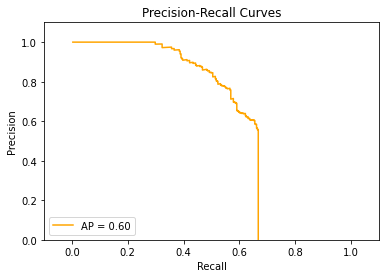

Average precision-recall score: 0.62


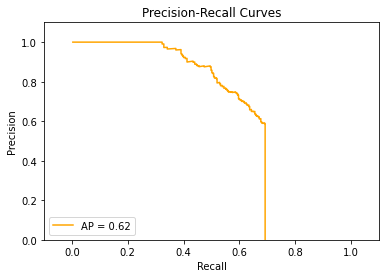

Average precision-recall score: 0.63


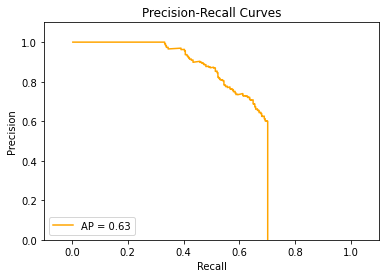

Average precision-recall score: 0.66


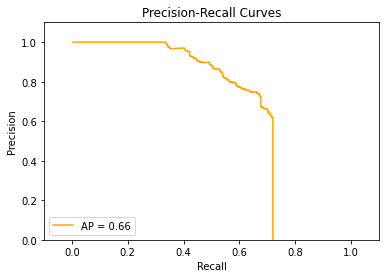

Average precision-recall score: 0.67


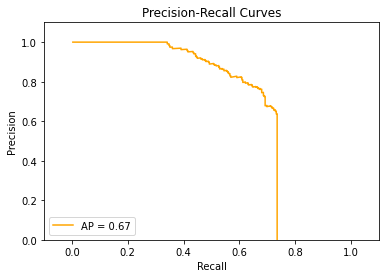

Average precision-recall score: 0.69


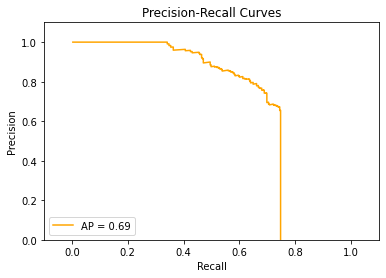

Average precision-recall score: 0.72


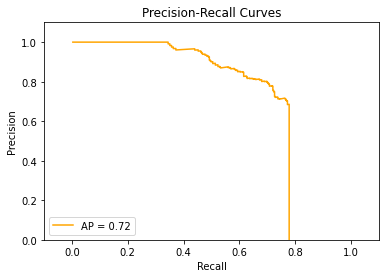

Average precision-recall score: 0.75


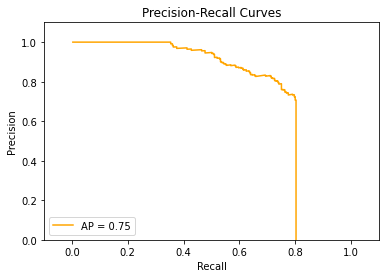

Average precision-recall score: 0.77


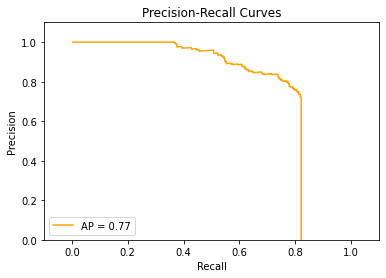

Average precision-recall score: 0.79


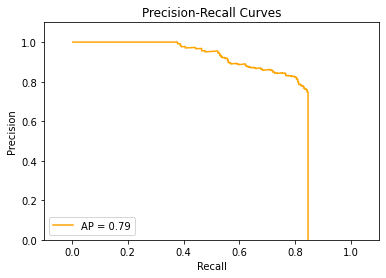

Average precision-recall score: 0.81


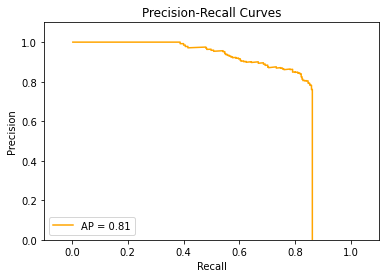

Average precision-recall score: 0.82


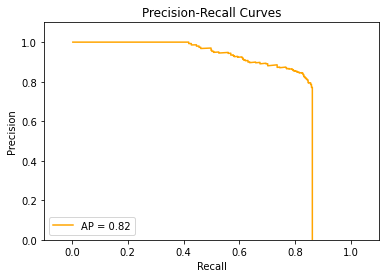

Average precision-recall score: 0.82


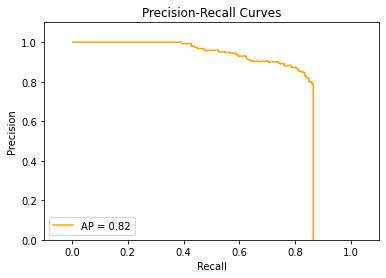

Average precision-recall score: 0.82


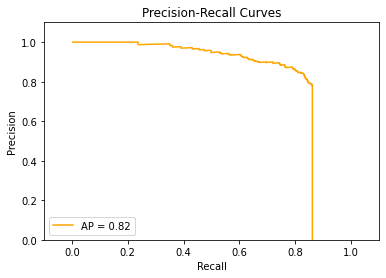

Average precision-recall score: 0.81


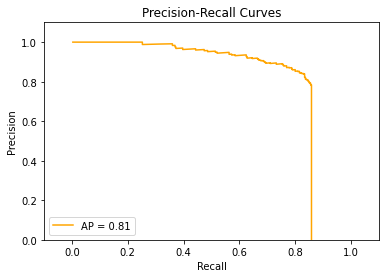

Average precision-recall score: 0.81


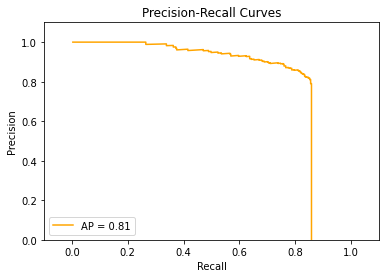

Average precision-recall score: 0.81


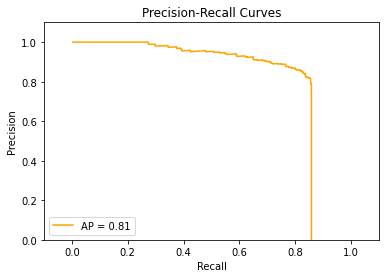

Average precision-recall score: 0.78


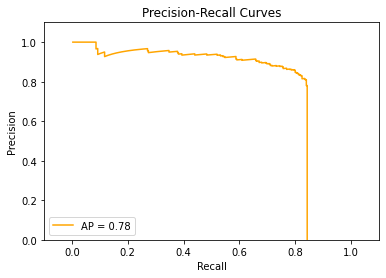

Average precision-recall score: 0.78


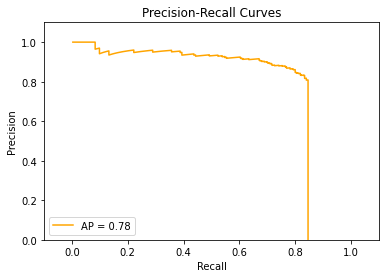

Average precision-recall score: 0.76


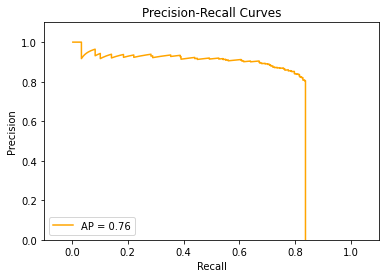

Average precision-recall score: 0.75


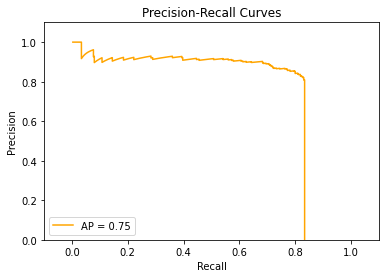

Average precision-recall score: 0.76


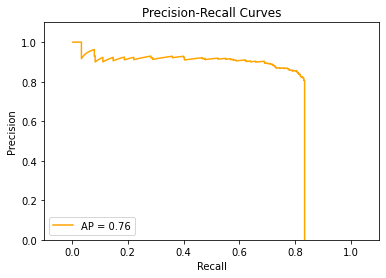

Average precision-recall score: 0.74


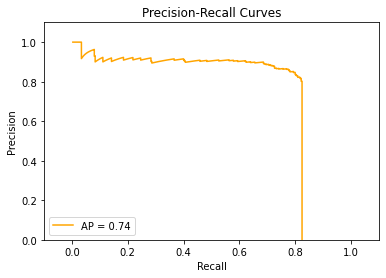

Average precision-recall score: 0.61


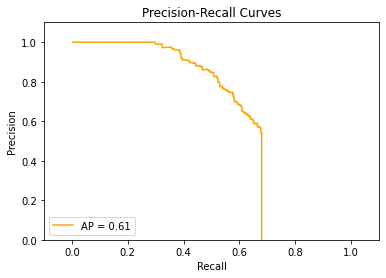

Average precision-recall score: 0.62


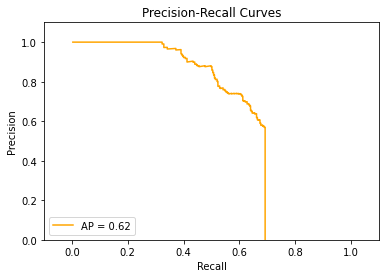

Average precision-recall score: 0.64


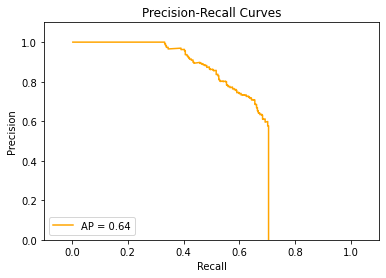

Average precision-recall score: 0.67


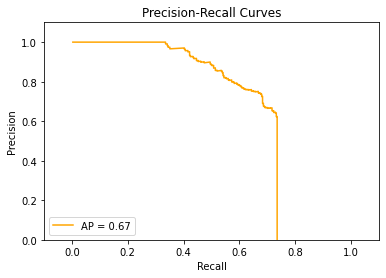

Average precision-recall score: 0.69


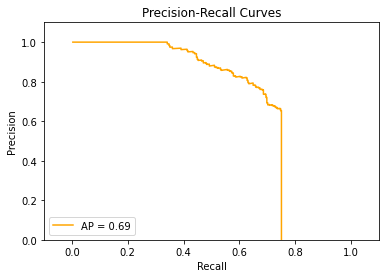

Average precision-recall score: 0.70


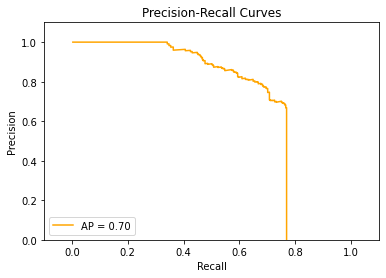

Average precision-recall score: 0.73


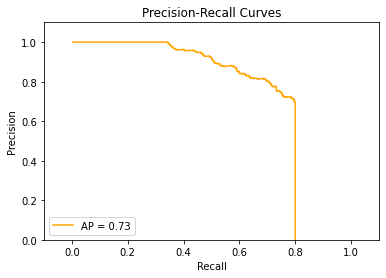

Average precision-recall score: 0.76


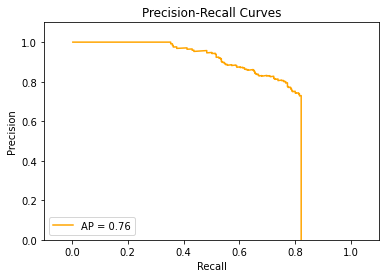

Average precision-recall score: 0.78


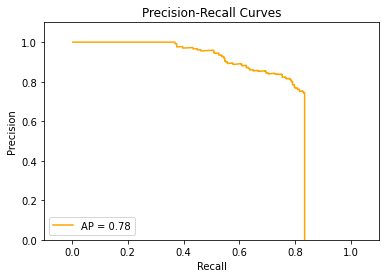

Average precision-recall score: 0.80


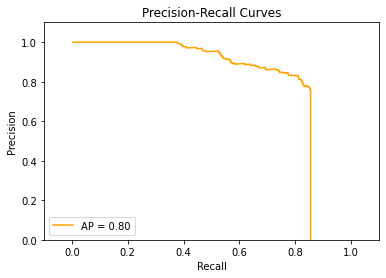

Average precision-recall score: 0.82


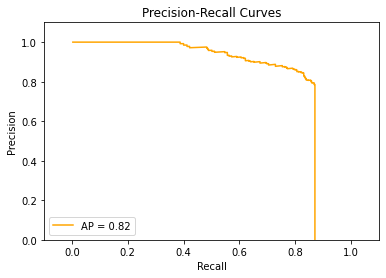

Average precision-recall score: 0.83


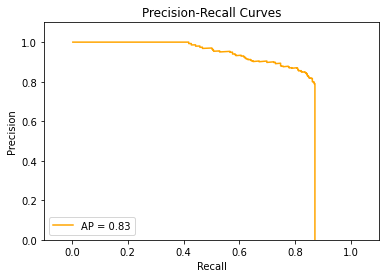

Average precision-recall score: 0.83


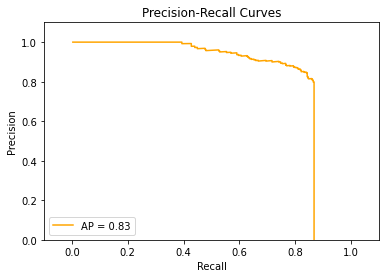

Average precision-recall score: 0.82


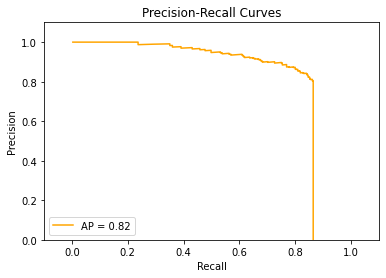

Average precision-recall score: 0.82


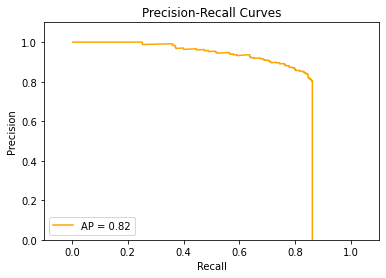

Average precision-recall score: 0.82


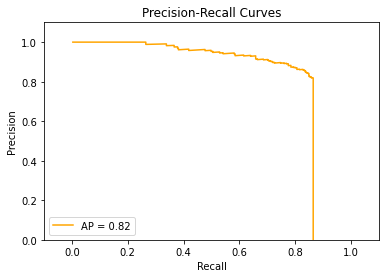

Average precision-recall score: 0.82


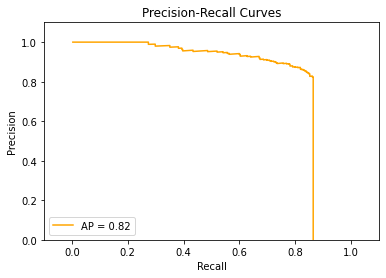

Average precision-recall score: 0.79


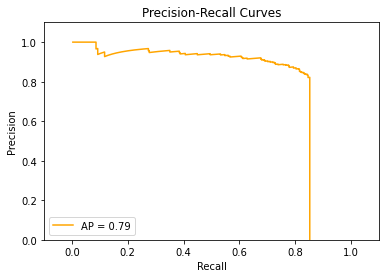

Average precision-recall score: 0.79


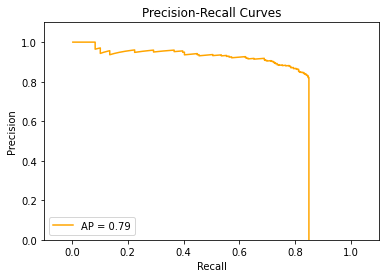

Average precision-recall score: 0.77


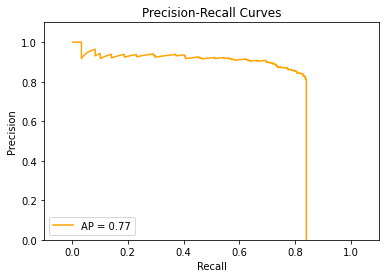

Average precision-recall score: 0.76


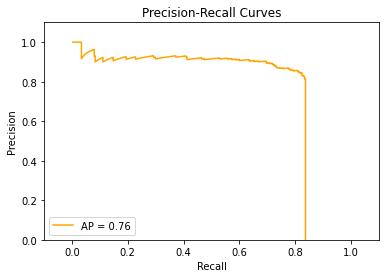

Average precision-recall score: 0.76


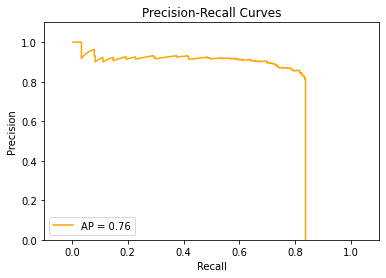

Average precision-recall score: 0.75


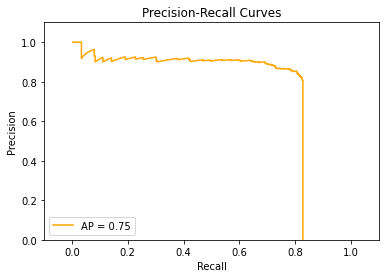

Average precision-recall score: 0.62


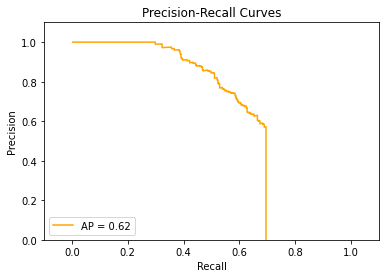

Average precision-recall score: 0.64


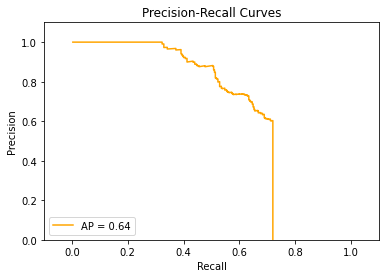

Average precision-recall score: 0.65


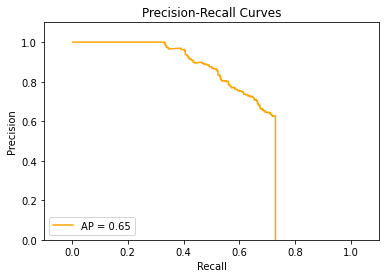

Average precision-recall score: 0.68


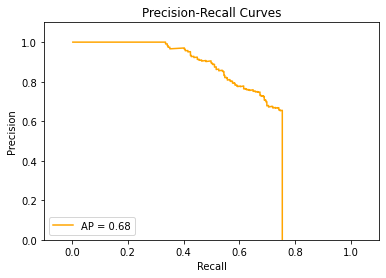

Average precision-recall score: 0.70


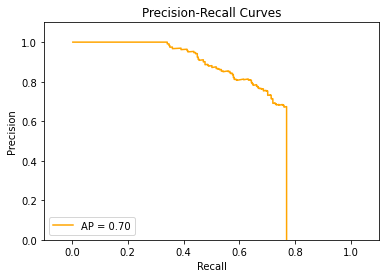

Average precision-recall score: 0.72


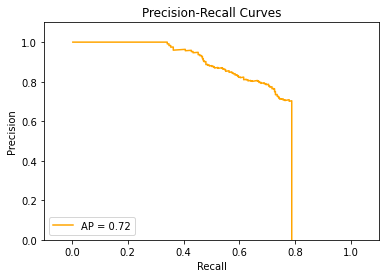

Average precision-recall score: 0.75


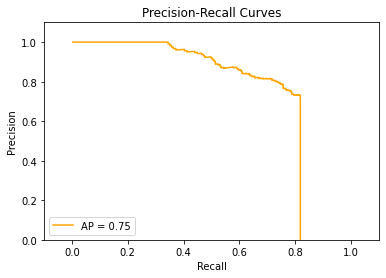

Average precision-recall score: 0.77


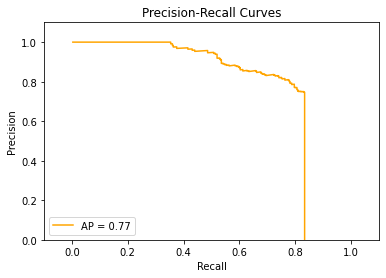

Average precision-recall score: 0.80


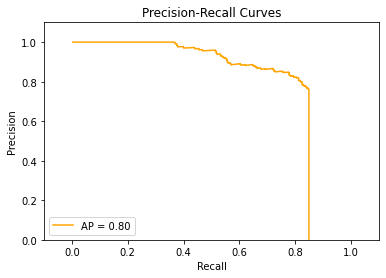

Average precision-recall score: 0.81


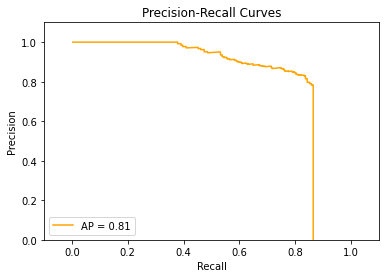

Average precision-recall score: 0.84


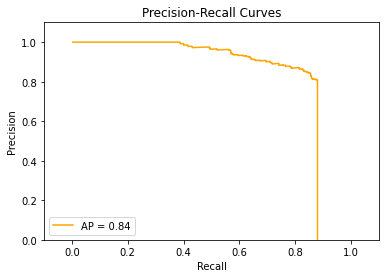

Average precision-recall score: 0.84


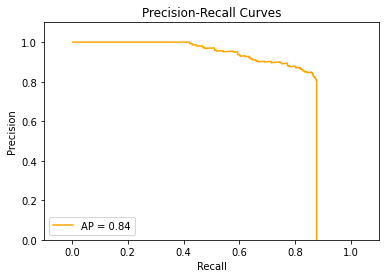

Average precision-recall score: 0.83


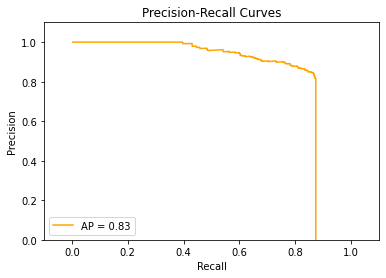

Average precision-recall score: 0.83


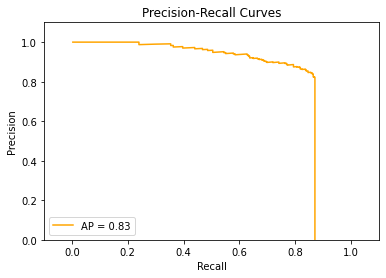

Average precision-recall score: 0.83


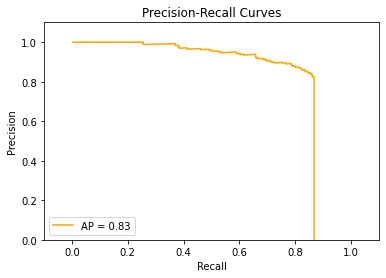

Average precision-recall score: 0.83


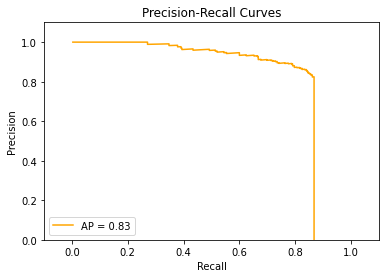

Average precision-recall score: 0.83


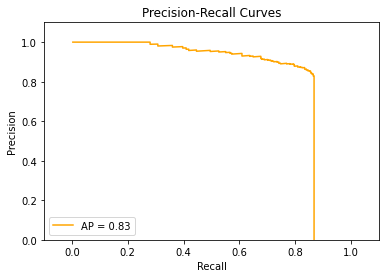

Average precision-recall score: 0.80


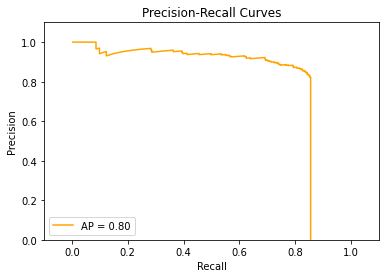

Average precision-recall score: 0.79


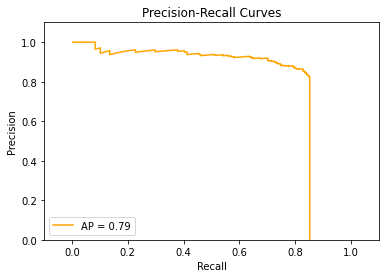

Average precision-recall score: 0.77


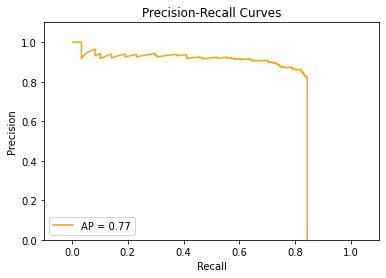

Average precision-recall score: 0.76


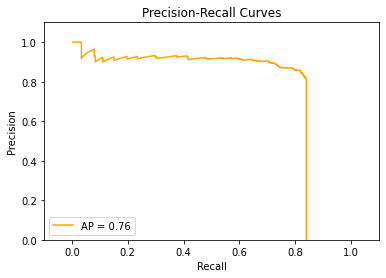

Average precision-recall score: 0.77


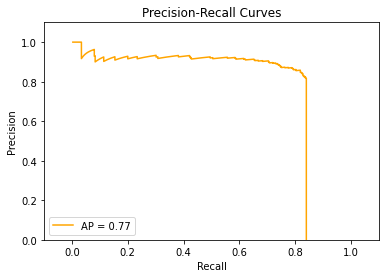

Average precision-recall score: 0.75


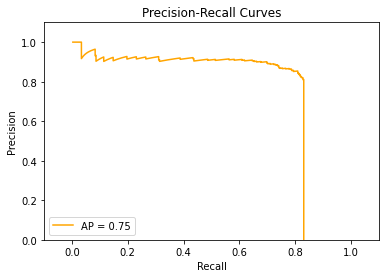

Average precision-recall score: 0.64


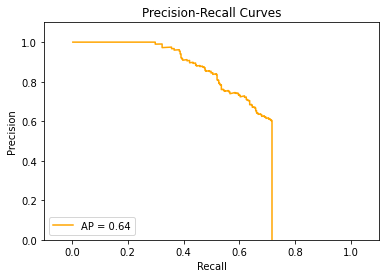

Average precision-recall score: 0.66


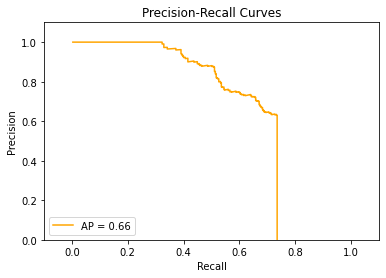

Average precision-recall score: 0.66


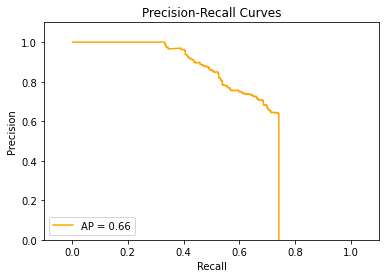

Average precision-recall score: 0.69


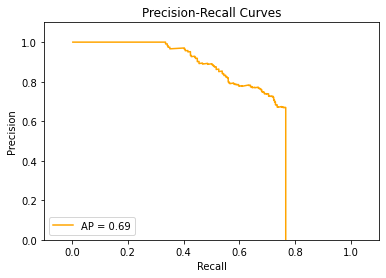

Average precision-recall score: 0.72


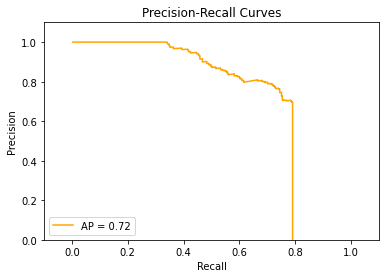

Average precision-recall score: 0.75


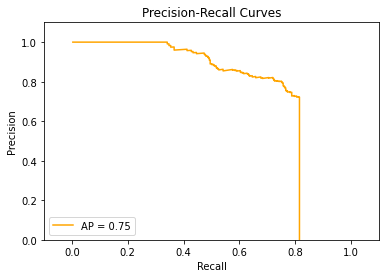

Average precision-recall score: 0.77


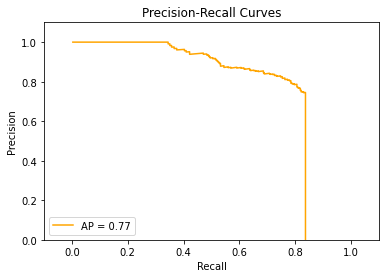

Average precision-recall score: 0.79


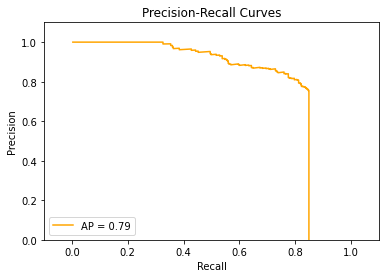

Average precision-recall score: 0.82


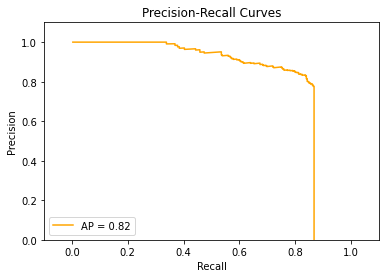

Average precision-recall score: 0.83


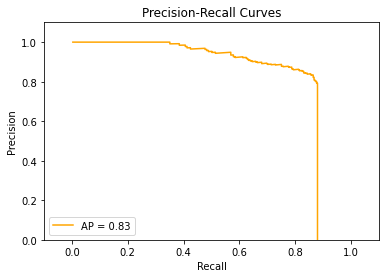

Average precision-recall score: 0.85


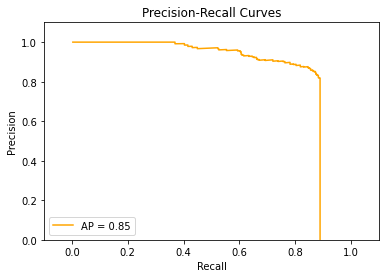

Average precision-recall score: 0.85


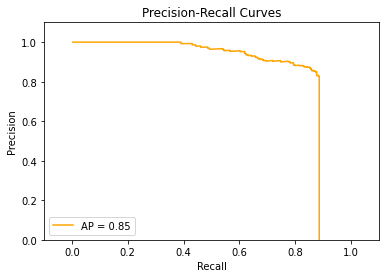

Average precision-recall score: 0.85


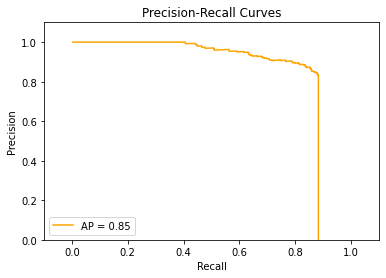

Average precision-recall score: 0.84


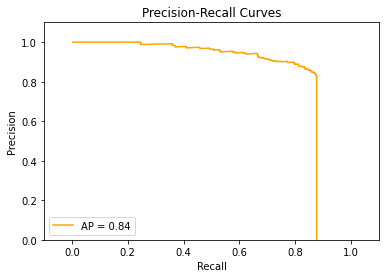

Average precision-recall score: 0.84


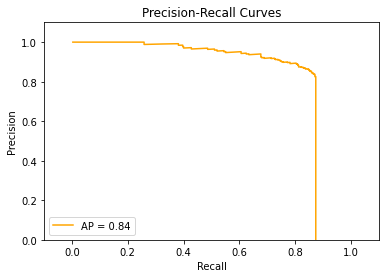

Average precision-recall score: 0.84


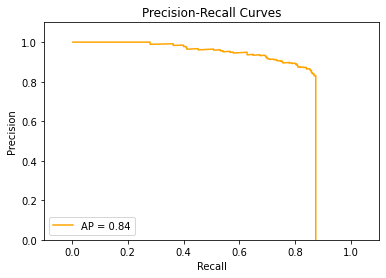

Average precision-recall score: 0.83


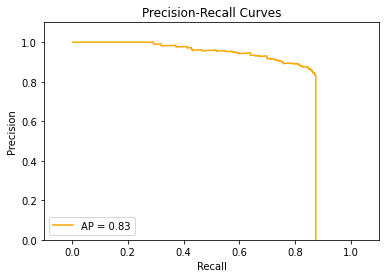

Average precision-recall score: 0.81


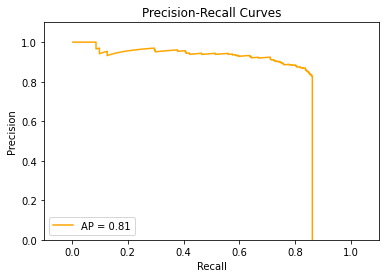

Average precision-recall score: 0.80


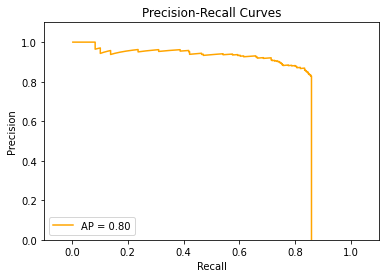

Average precision-recall score: 0.78


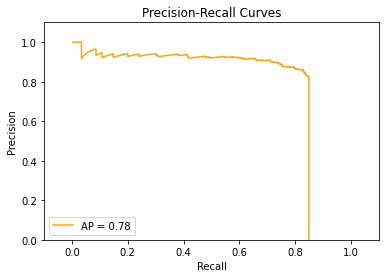

Average precision-recall score: 0.77


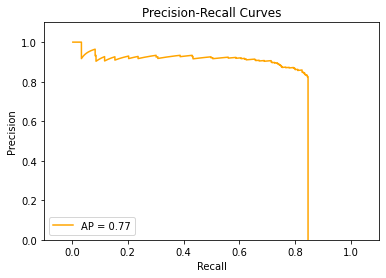

Average precision-recall score: 0.77


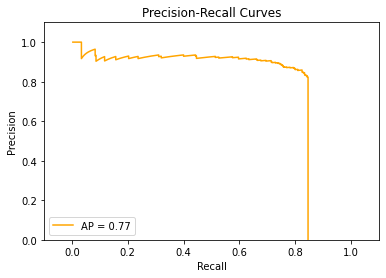

Average precision-recall score: 0.76


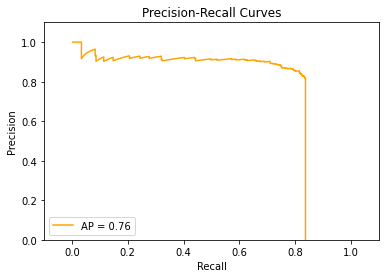

Average precision-recall score: 0.67


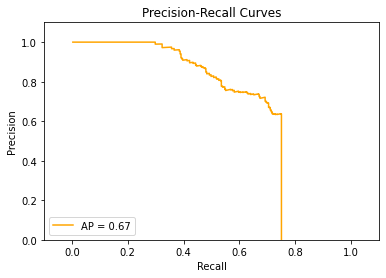

Average precision-recall score: 0.68


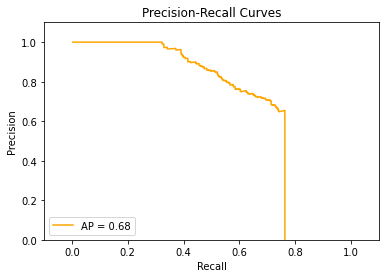

Average precision-recall score: 0.69


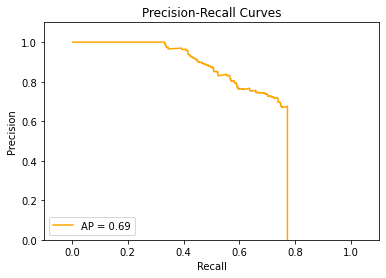

Average precision-recall score: 0.73


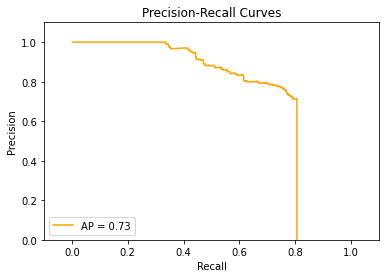

Average precision-recall score: 0.77


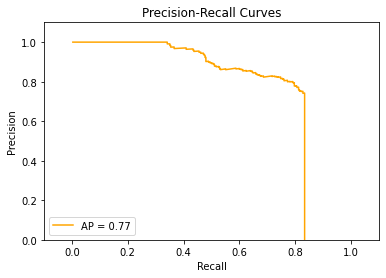

Average precision-recall score: 0.79


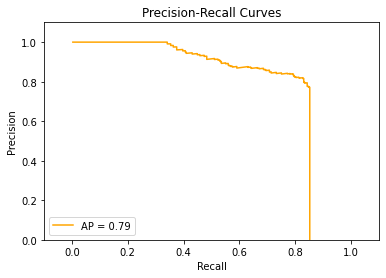

Average precision-recall score: 0.81


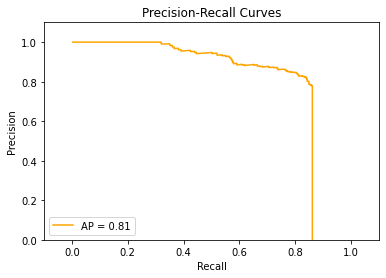

Average precision-recall score: 0.83


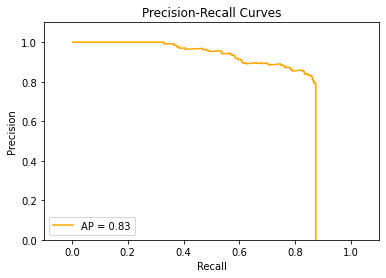

Average precision-recall score: 0.84


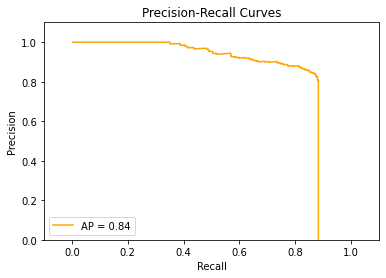

Average precision-recall score: 0.85


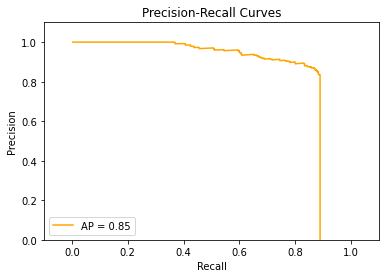

Average precision-recall score: 0.86


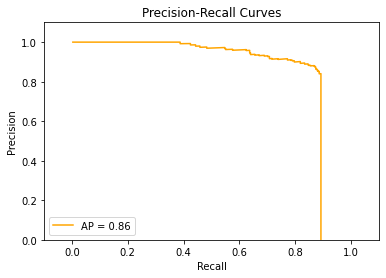

Average precision-recall score: 0.86


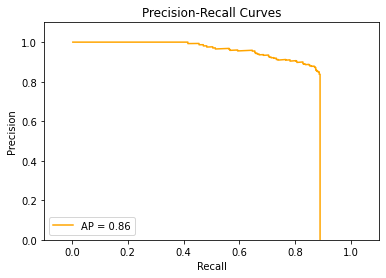

Average precision-recall score: 0.86


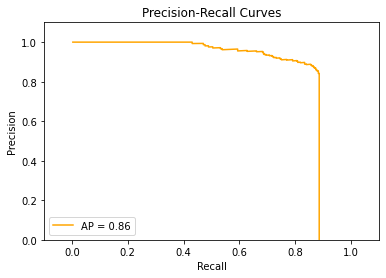

Average precision-recall score: 0.85


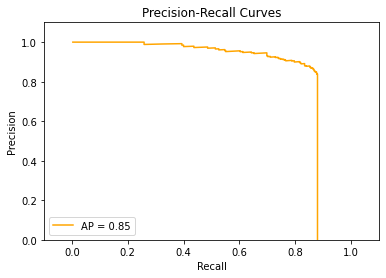

Average precision-recall score: 0.84


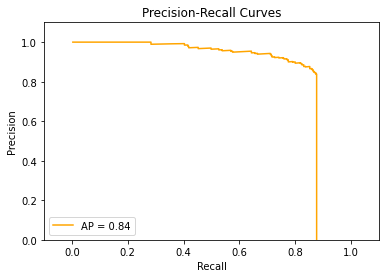

Average precision-recall score: 0.84


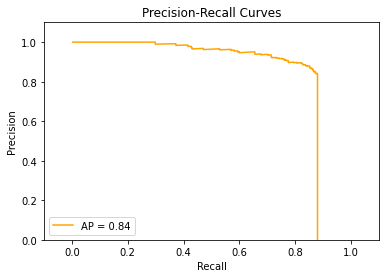

Average precision-recall score: 0.84


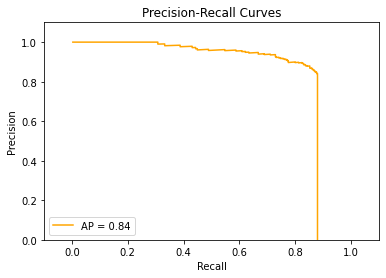

Average precision-recall score: 0.81


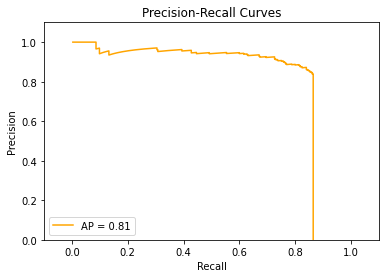

Average precision-recall score: 0.81


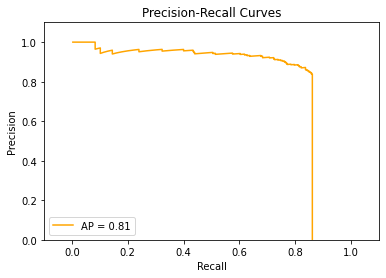

Average precision-recall score: 0.79


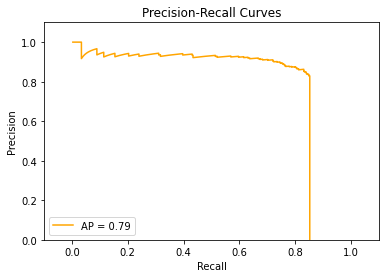

Average precision-recall score: 0.78


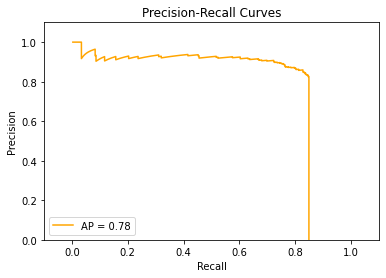

Average precision-recall score: 0.78


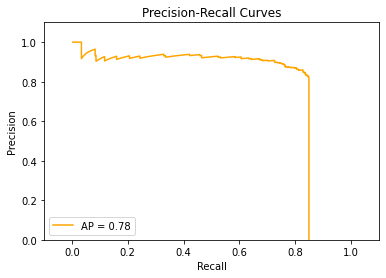

Average precision-recall score: 0.76


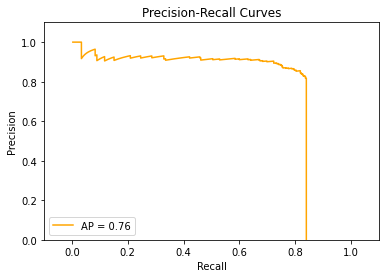

Average precision-recall score: 0.69


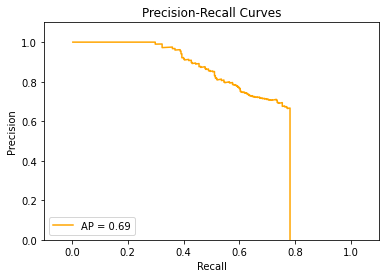

Average precision-recall score: 0.72


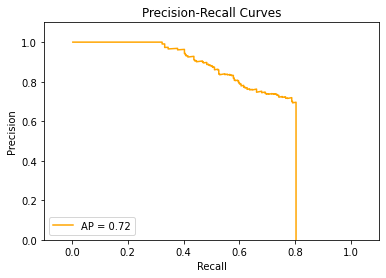

Average precision-recall score: 0.74


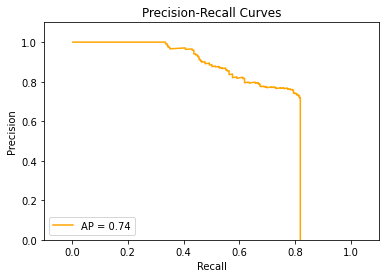

Average precision-recall score: 0.79


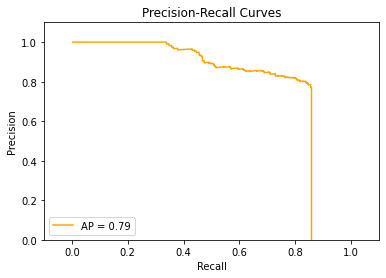

Average precision-recall score: 0.81


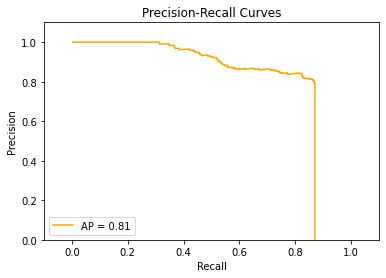

Average precision-recall score: 0.83


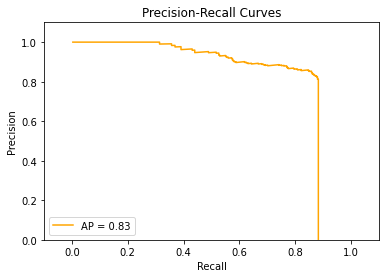

Average precision-recall score: 0.84


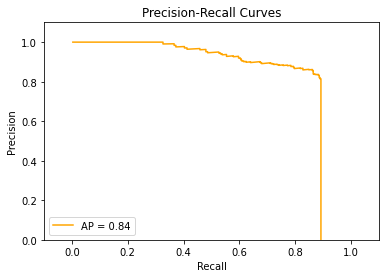

Average precision-recall score: 0.86


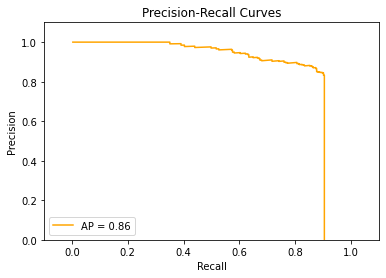

Average precision-recall score: 0.87


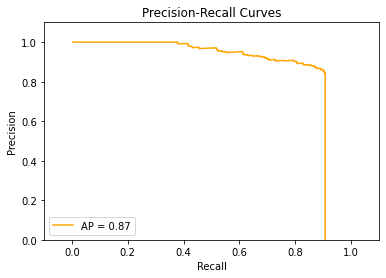

Average precision-recall score: 0.88


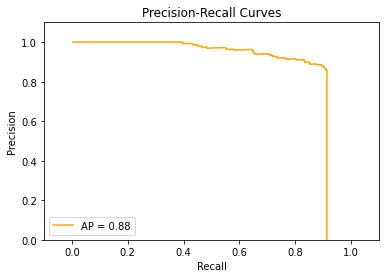

Average precision-recall score: 0.88


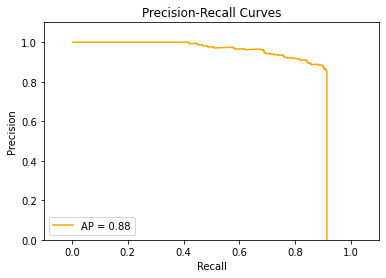

Average precision-recall score: 0.88


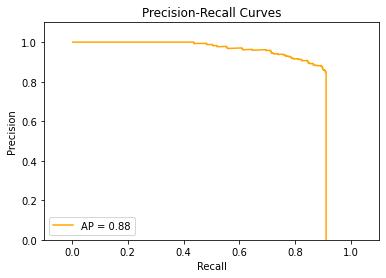

Average precision-recall score: 0.88


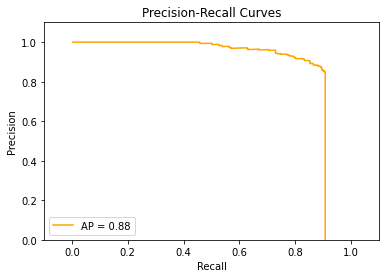

Average precision-recall score: 0.87


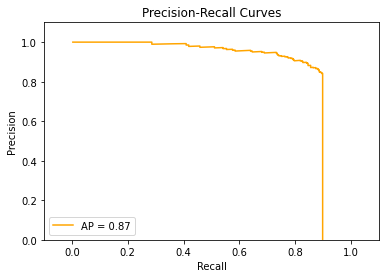

Average precision-recall score: 0.87


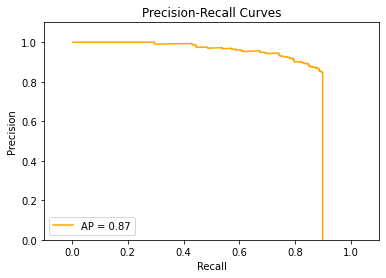

Average precision-recall score: 0.86


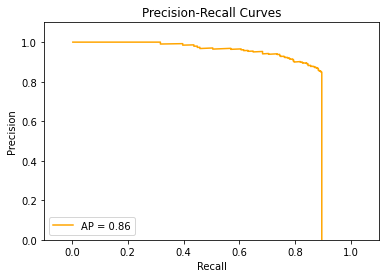

Average precision-recall score: 0.86


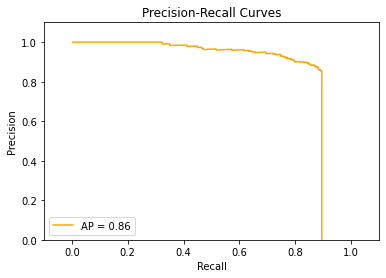

Average precision-recall score: 0.83


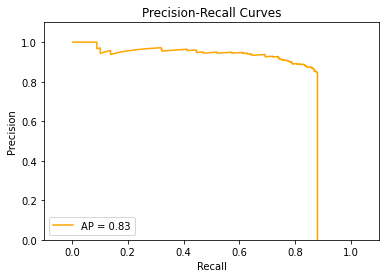

Average precision-recall score: 0.83


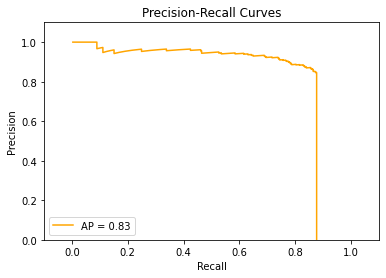

Average precision-recall score: 0.80


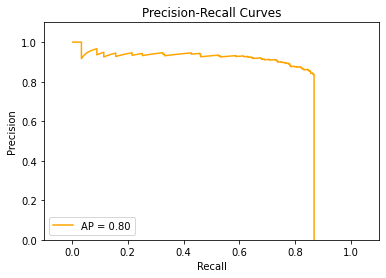

Average precision-recall score: 0.79


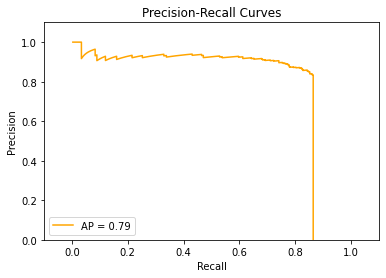

Average precision-recall score: 0.79


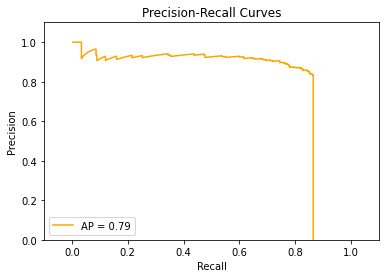

Average precision-recall score: 0.78


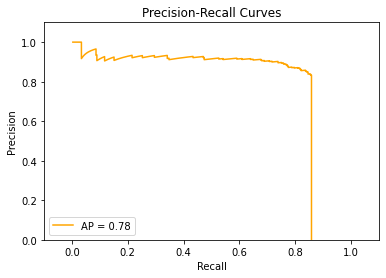

Average precision-recall score: 0.72


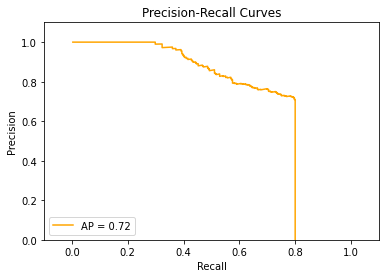

Average precision-recall score: 0.74


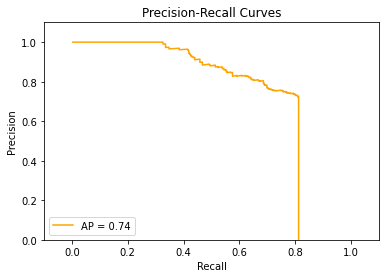

Average precision-recall score: 0.77


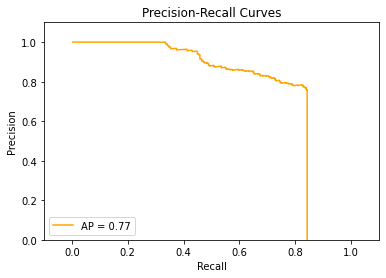

Average precision-recall score: 0.81


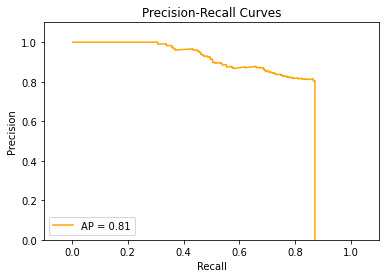

Average precision-recall score: 0.83


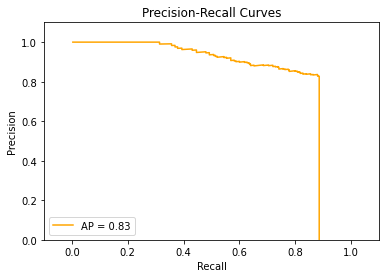

Average precision-recall score: 0.84


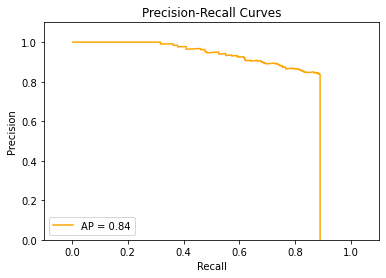

Average precision-recall score: 0.86


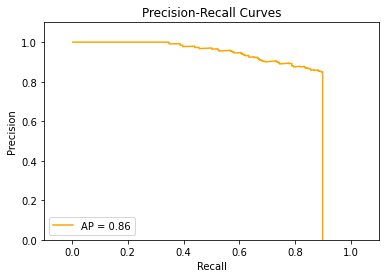

Average precision-recall score: 0.86


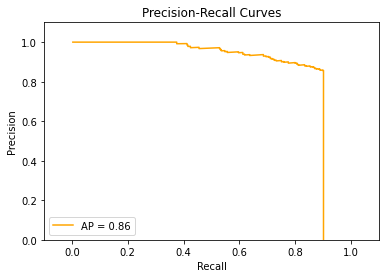

Average precision-recall score: 0.88


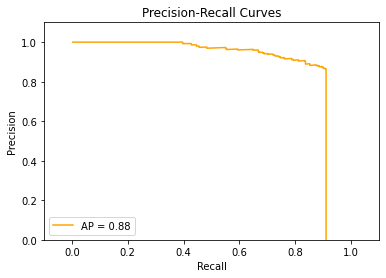

Average precision-recall score: 0.88


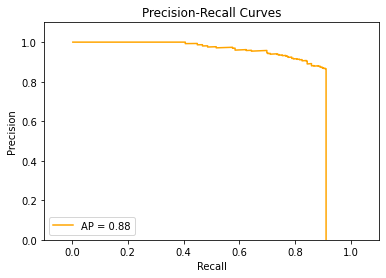

Average precision-recall score: 0.88


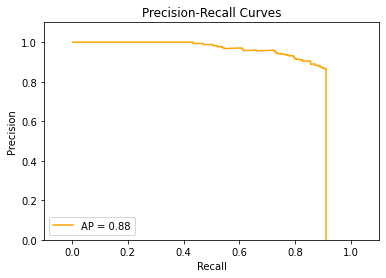

Average precision-recall score: 0.88


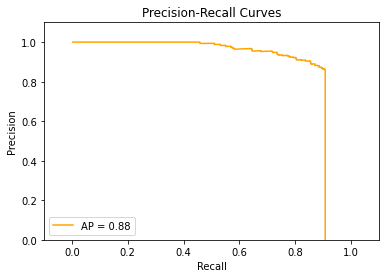

Average precision-recall score: 0.88


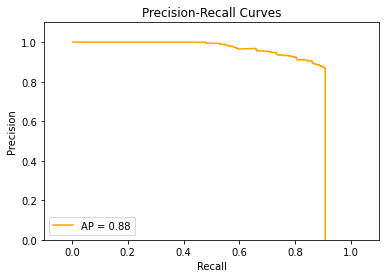

Average precision-recall score: 0.87


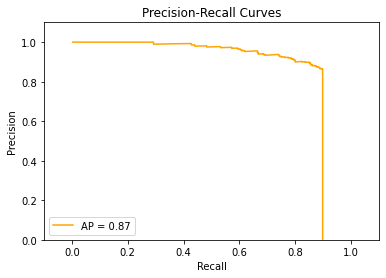

Average precision-recall score: 0.87


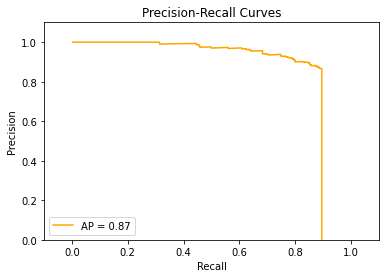

Average precision-recall score: 0.86


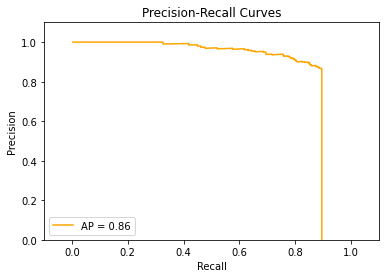

Average precision-recall score: 0.86


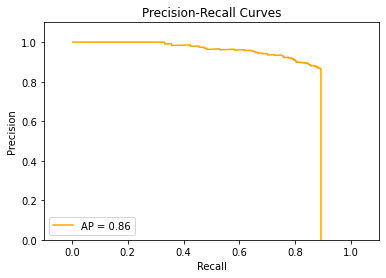

Average precision-recall score: 0.83


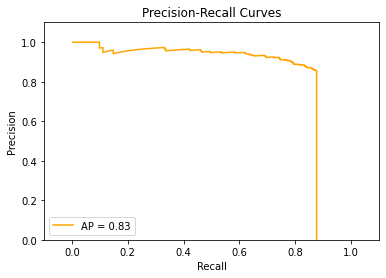

Average precision-recall score: 0.82


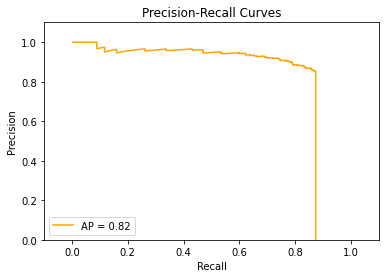

Average precision-recall score: 0.80


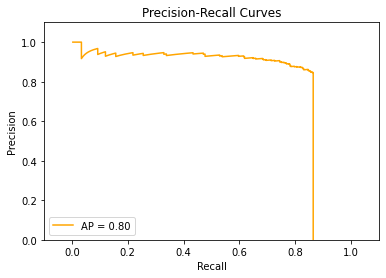

Average precision-recall score: 0.79


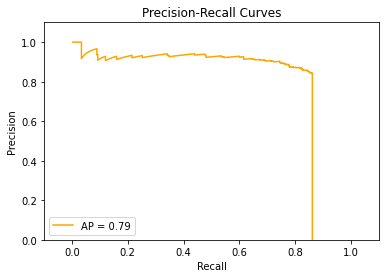

Average precision-recall score: 0.79


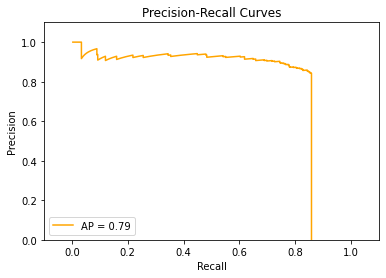

Average precision-recall score: 0.78


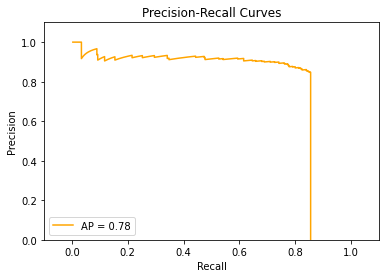

Average precision-recall score: 0.73


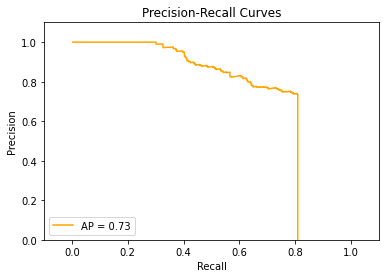

Average precision-recall score: 0.75


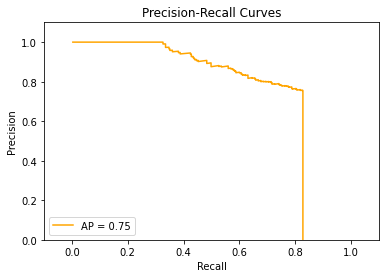

Average precision-recall score: 0.79


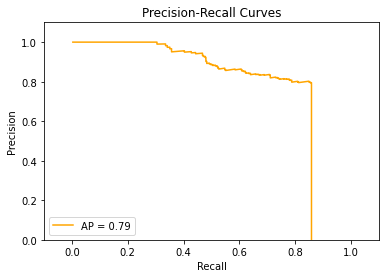

Average precision-recall score: 0.81


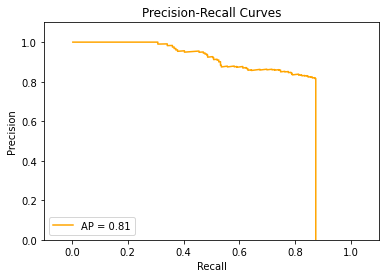

Average precision-recall score: 0.84


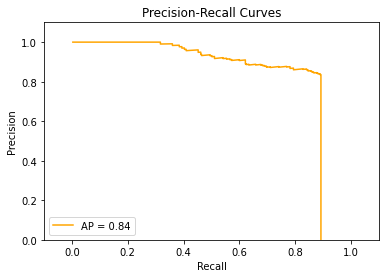

Average precision-recall score: 0.85


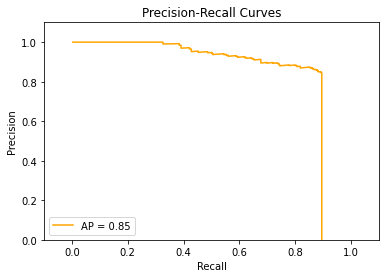

Average precision-recall score: 0.86


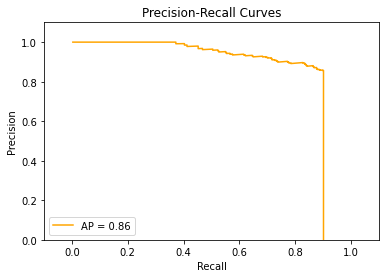

Average precision-recall score: 0.87


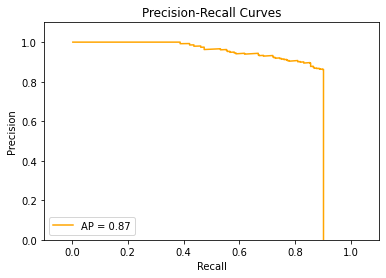

Average precision-recall score: 0.87


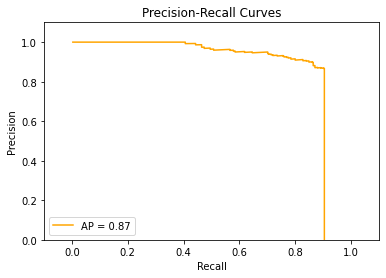

Average precision-recall score: 0.87


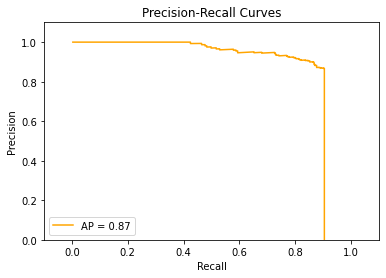

Average precision-recall score: 0.88


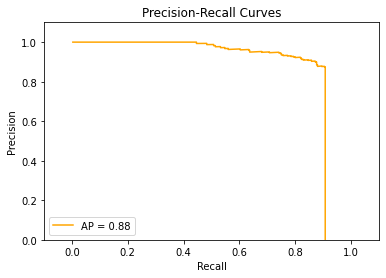

Average precision-recall score: 0.88


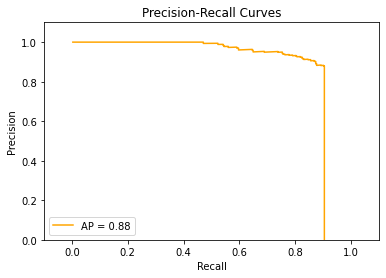

Average precision-recall score: 0.88


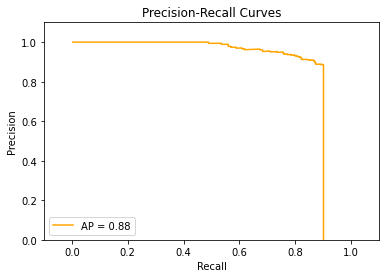

Average precision-recall score: 0.86


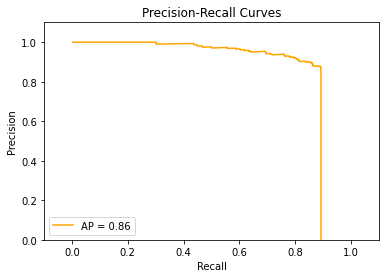

Average precision-recall score: 0.86


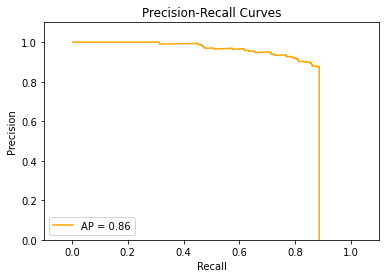

Average precision-recall score: 0.86


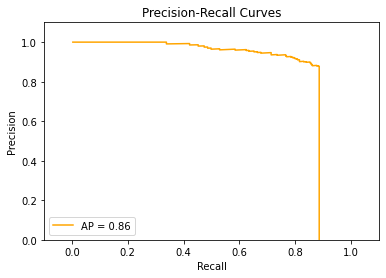

Average precision-recall score: 0.85


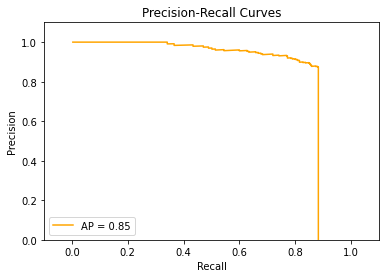

Average precision-recall score: 0.82


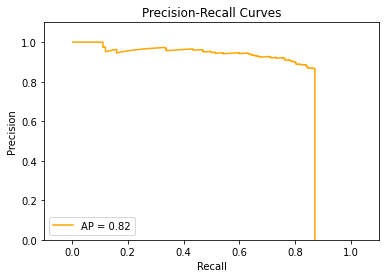

Average precision-recall score: 0.82


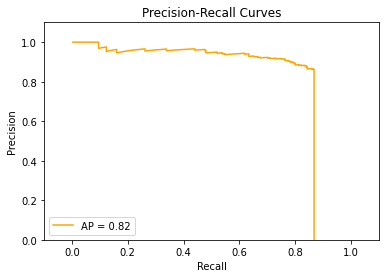

Average precision-recall score: 0.79


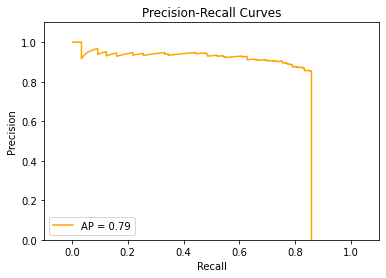

Average precision-recall score: 0.79


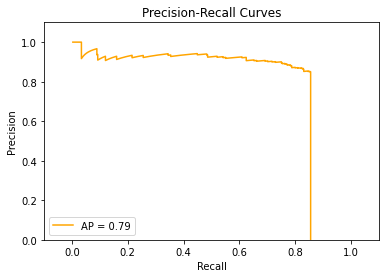

Average precision-recall score: 0.79


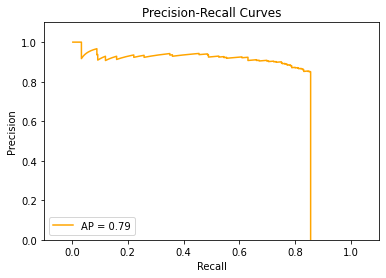

Average precision-recall score: 0.78


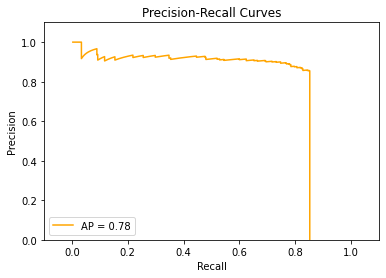

Average precision-recall score: 0.75


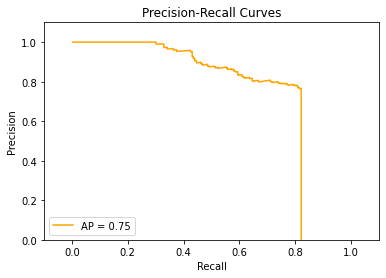

Average precision-recall score: 0.79


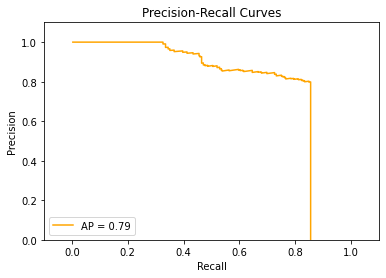

Average precision-recall score: 0.82


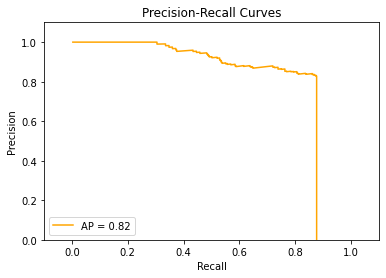

Average precision-recall score: 0.84


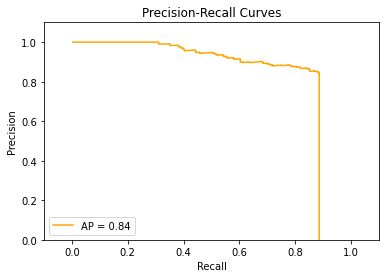

Average precision-recall score: 0.84


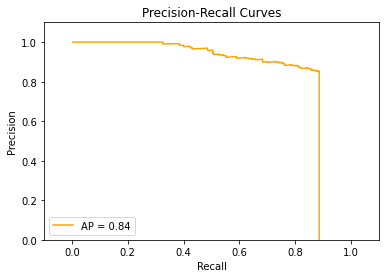

Average precision-recall score: 0.84


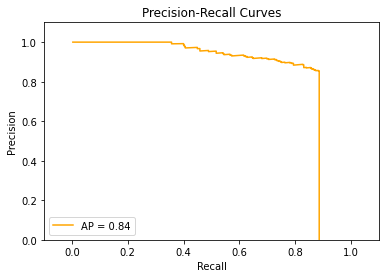

Average precision-recall score: 0.86


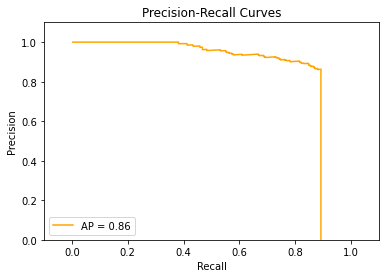

Average precision-recall score: 0.87


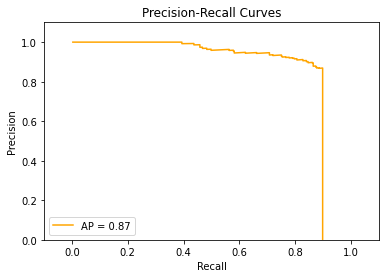

Average precision-recall score: 0.87


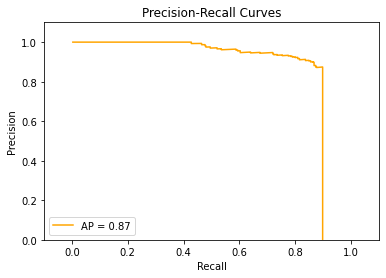

Average precision-recall score: 0.88


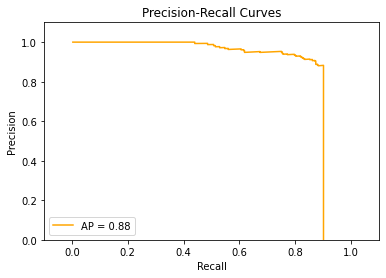

Average precision-recall score: 0.88


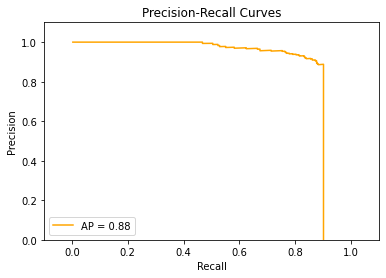

Average precision-recall score: 0.88


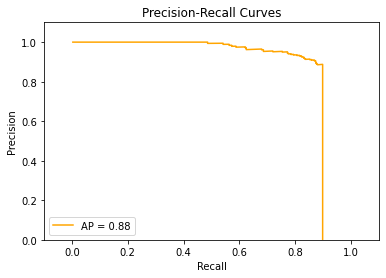

Average precision-recall score: 0.87


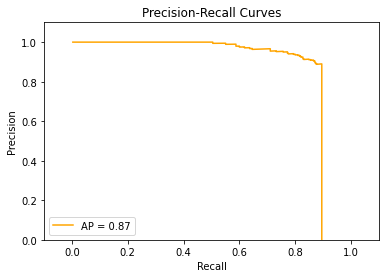

Average precision-recall score: 0.86


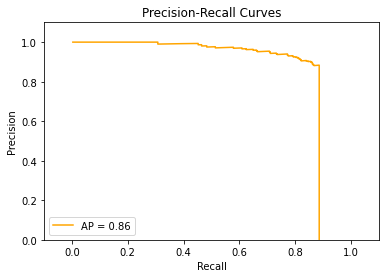

Average precision-recall score: 0.86


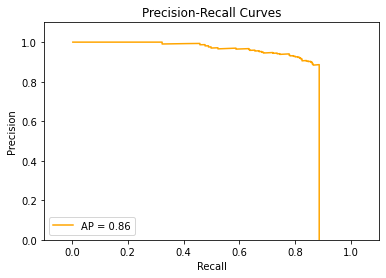

Average precision-recall score: 0.86


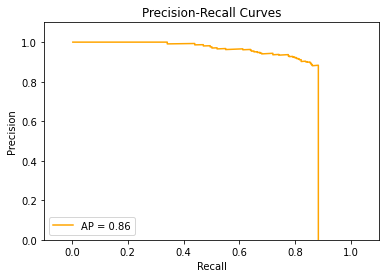

Average precision-recall score: 0.85


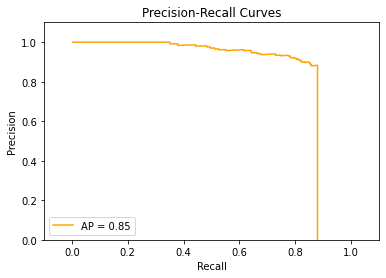

Average precision-recall score: 0.82


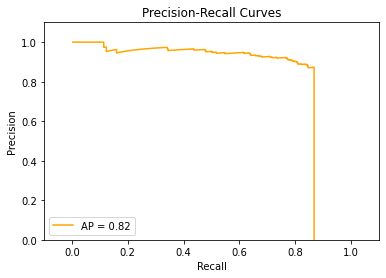

Average precision-recall score: 0.82


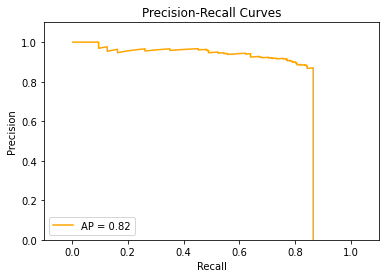

Average precision-recall score: 0.79


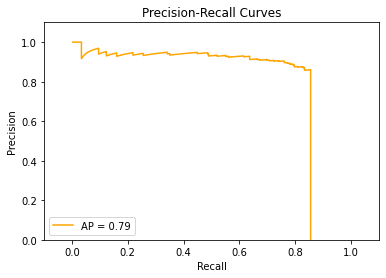

Average precision-recall score: 0.78


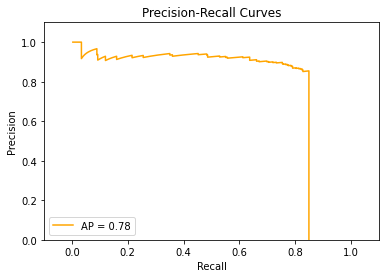

Average precision-recall score: 0.79


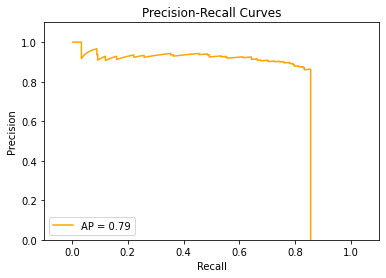

Average precision-recall score: 0.78


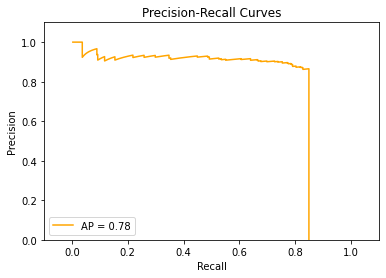

Average precision-recall score: 0.77


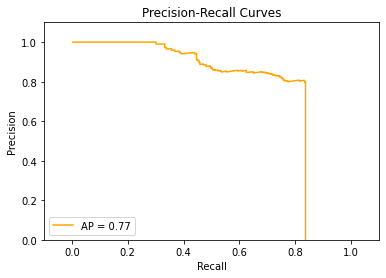

Average precision-recall score: 0.79


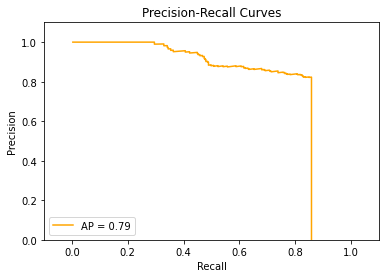

Average precision-recall score: 0.82


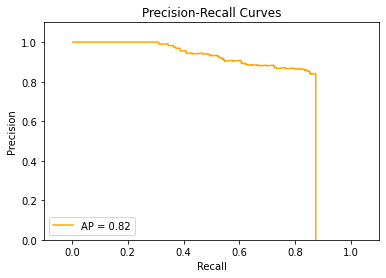

Average precision-recall score: 0.84


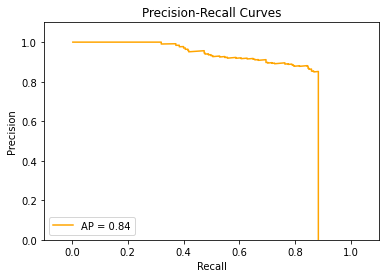

Average precision-recall score: 0.85


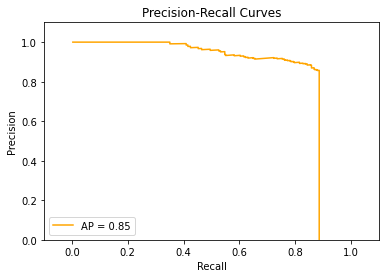

Average precision-recall score: 0.85


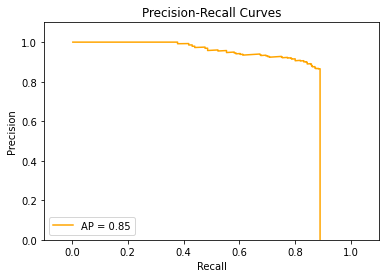

Average precision-recall score: 0.86


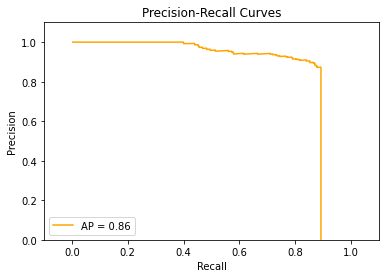

Average precision-recall score: 0.87


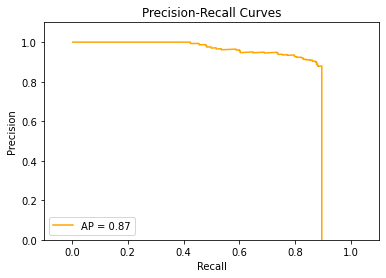

Average precision-recall score: 0.87


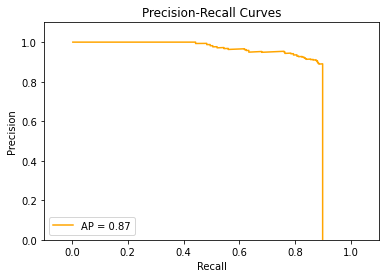

Average precision-recall score: 0.88


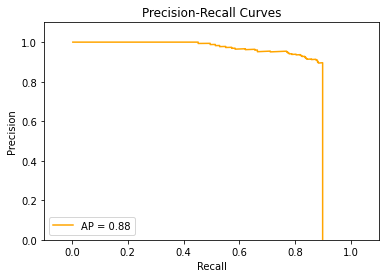

Average precision-recall score: 0.88


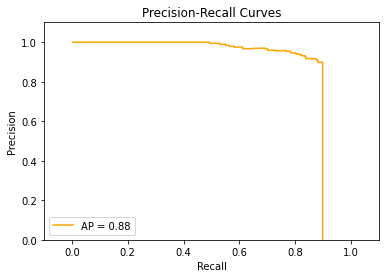

Average precision-recall score: 0.88


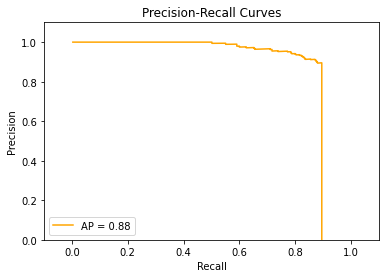

Average precision-recall score: 0.87


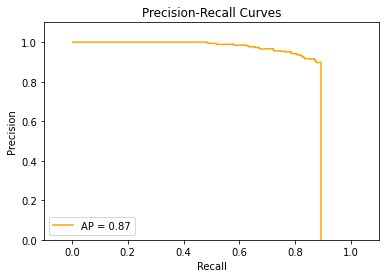

Average precision-recall score: 0.86


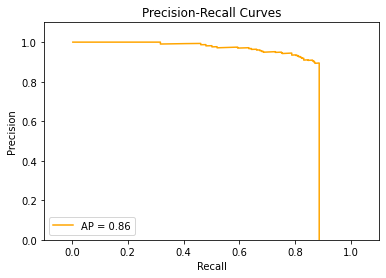

Average precision-recall score: 0.86


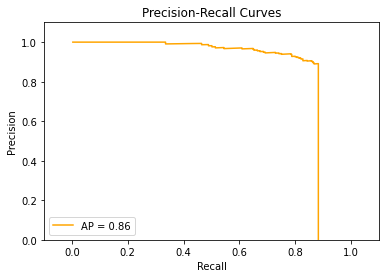

Average precision-recall score: 0.85


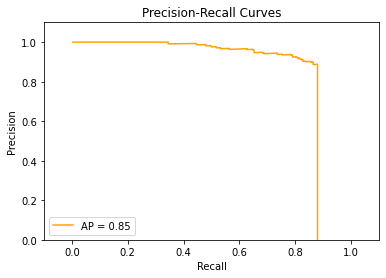

Average precision-recall score: 0.85


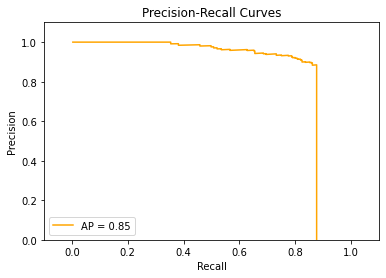

Average precision-recall score: 0.82


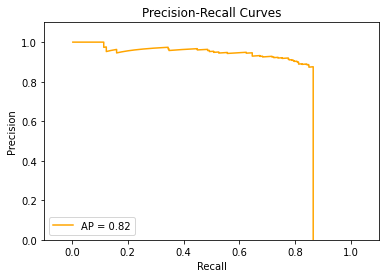

Average precision-recall score: 0.81


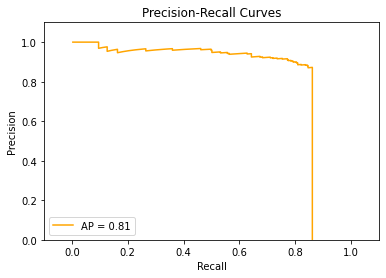

Average precision-recall score: 0.79


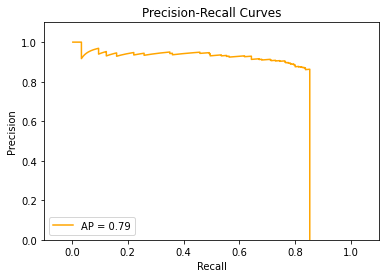

Average precision-recall score: 0.79


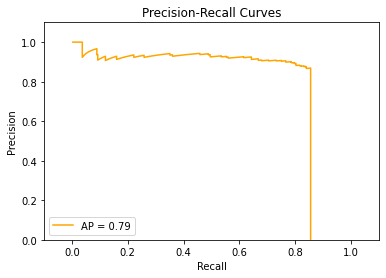

Average precision-recall score: 0.79


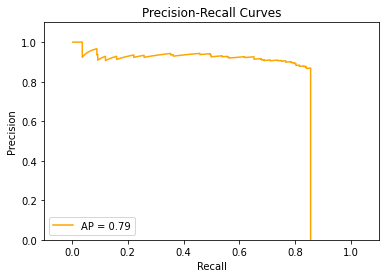

Average precision-recall score: 0.78


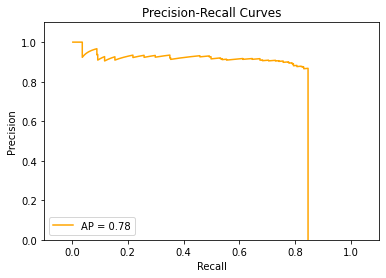

Average precision-recall score: 0.79


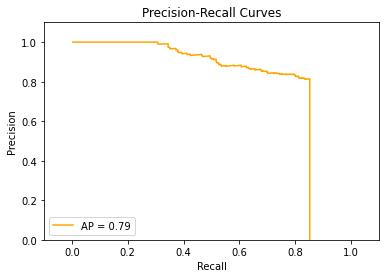

Average precision-recall score: 0.81


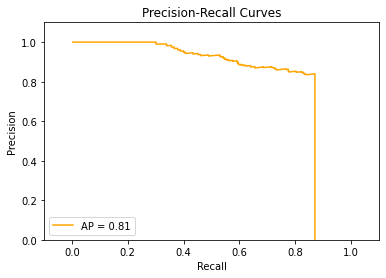

Average precision-recall score: 0.84


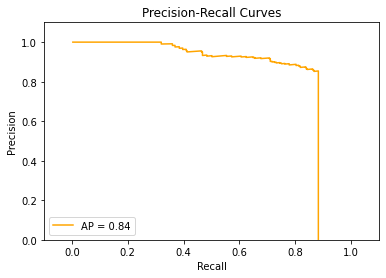

Average precision-recall score: 0.85


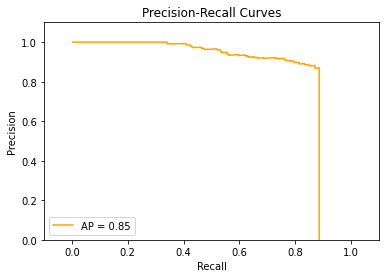

Average precision-recall score: 0.86


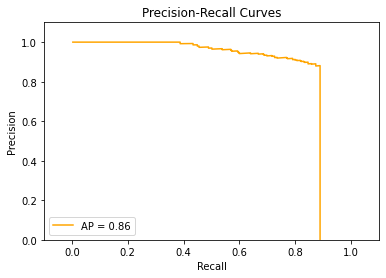

Average precision-recall score: 0.86


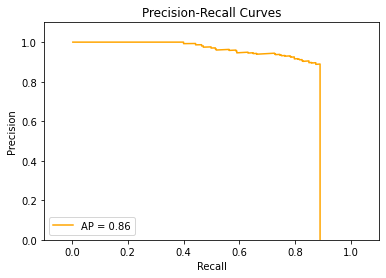

Average precision-recall score: 0.86


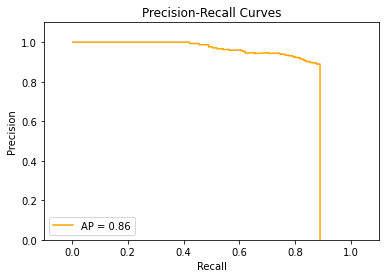

Average precision-recall score: 0.87


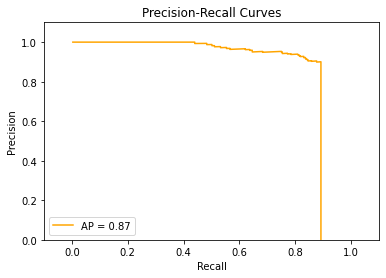

Average precision-recall score: 0.87


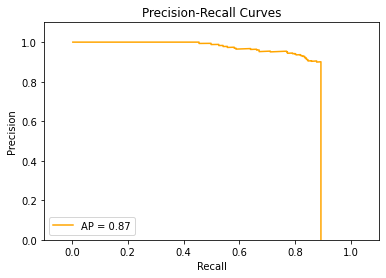

Average precision-recall score: 0.87


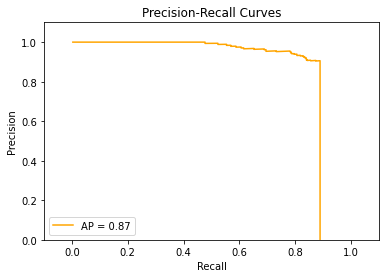

Average precision-recall score: 0.87


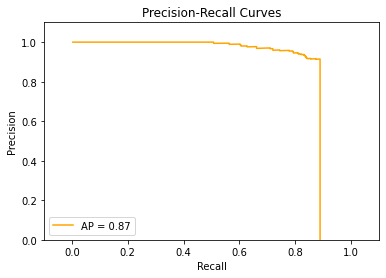

Average precision-recall score: 0.87


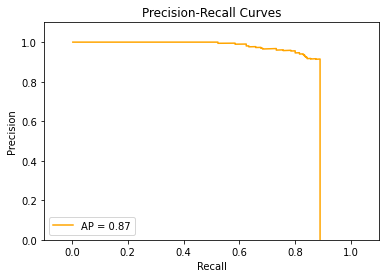

Average precision-recall score: 0.87


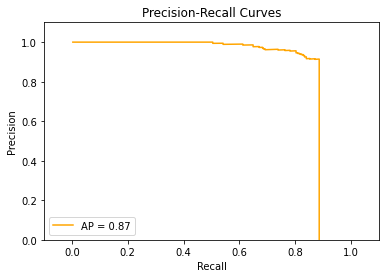

Average precision-recall score: 0.86


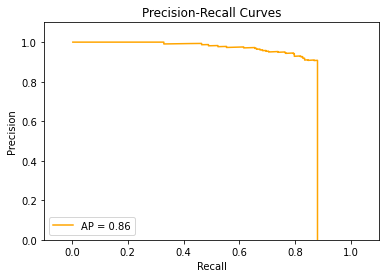

Average precision-recall score: 0.85


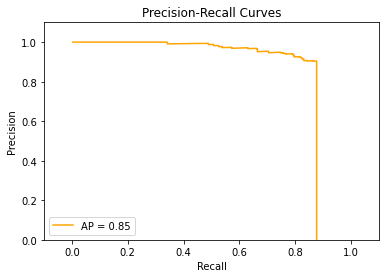

Average precision-recall score: 0.85


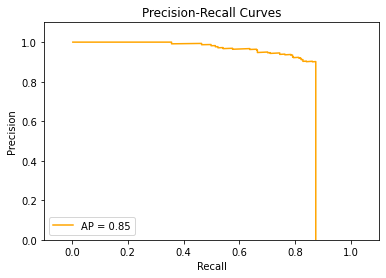

Average precision-recall score: 0.84


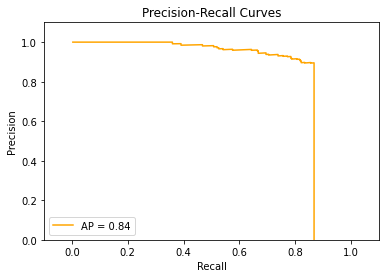

Average precision-recall score: 0.81


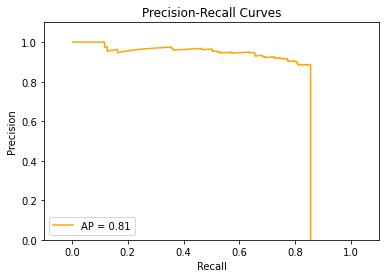

Average precision-recall score: 0.81


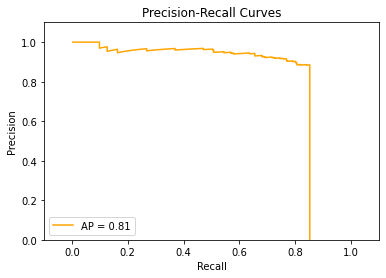

Average precision-recall score: 0.79


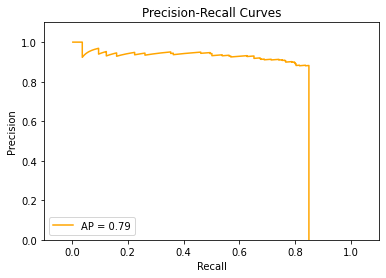

Average precision-recall score: 0.78


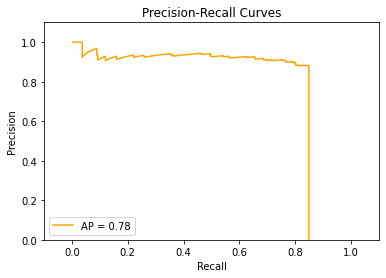

Average precision-recall score: 0.79


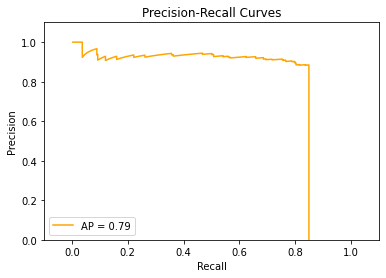

Average precision-recall score: 0.77


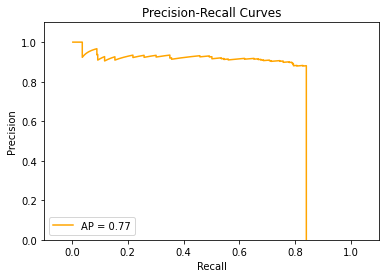

Average precision-recall score: 0.79


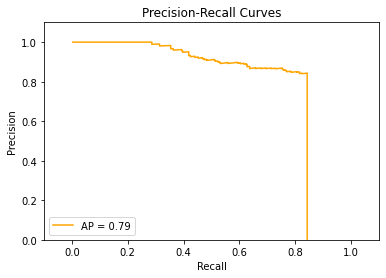

Average precision-recall score: 0.81


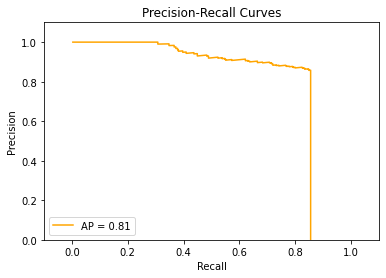

Average precision-recall score: 0.82


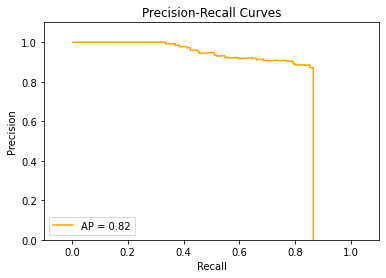

Average precision-recall score: 0.83


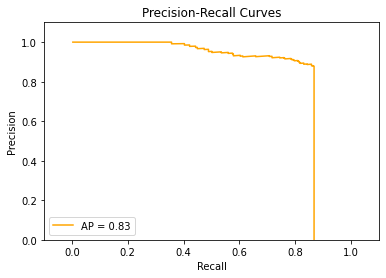

Average precision-recall score: 0.84


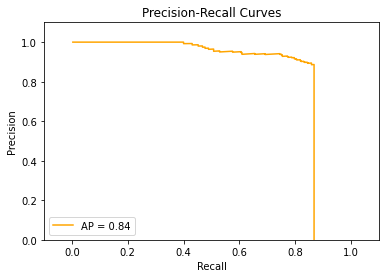

Average precision-recall score: 0.84


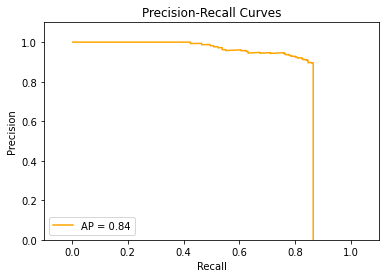

Average precision-recall score: 0.84


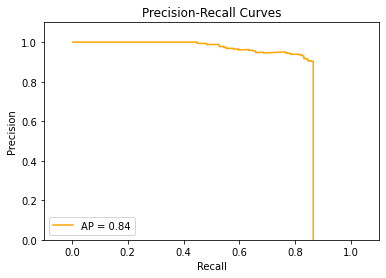

Average precision-recall score: 0.85


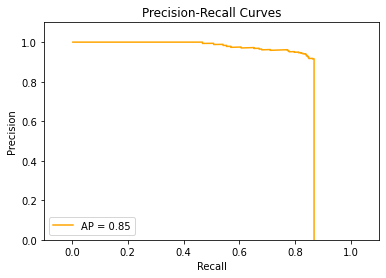

Average precision-recall score: 0.85


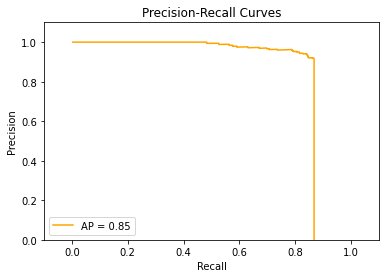

Average precision-recall score: 0.85


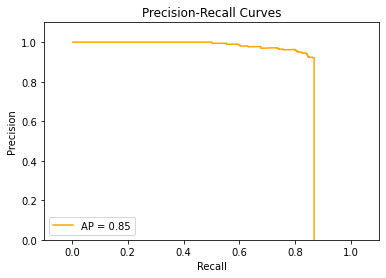

Average precision-recall score: 0.86


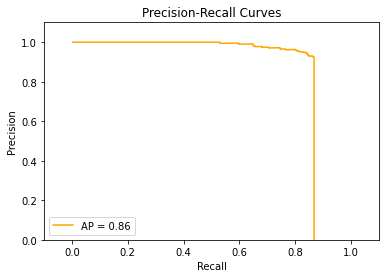

Average precision-recall score: 0.86


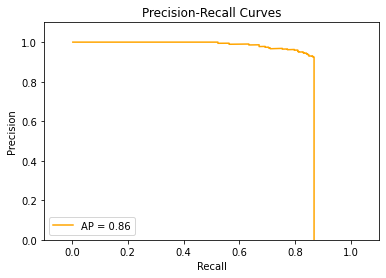

Average precision-recall score: 0.85


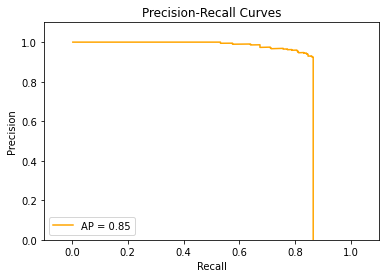

Average precision-recall score: 0.84


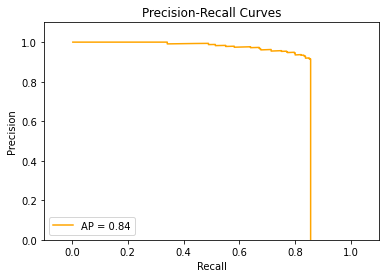

Average precision-recall score: 0.83


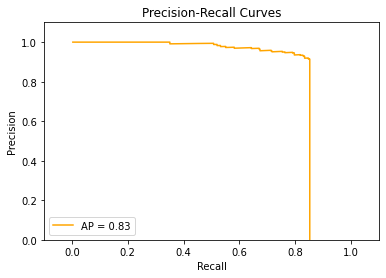

Average precision-recall score: 0.83


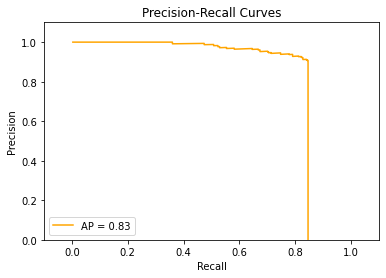

Average precision-recall score: 0.82


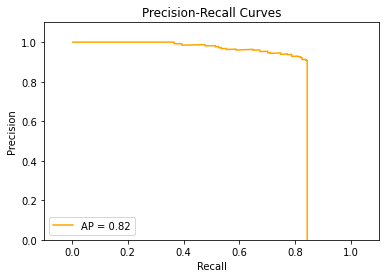

Average precision-recall score: 0.79


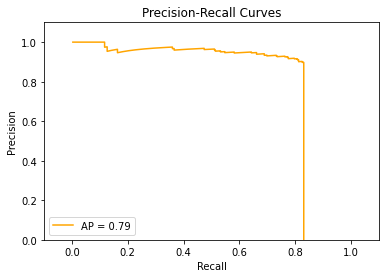

Average precision-recall score: 0.79


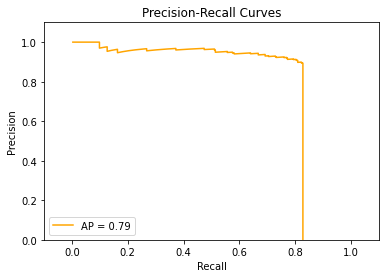

Average precision-recall score: 0.77


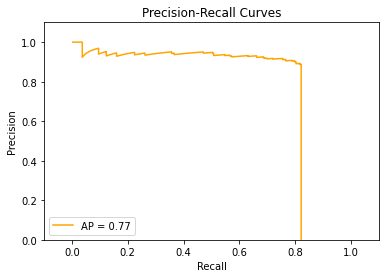

Average precision-recall score: 0.76


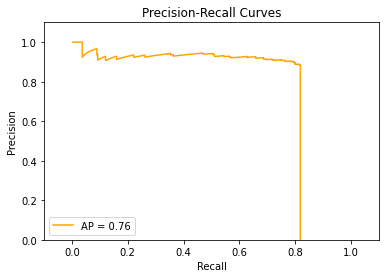

Average precision-recall score: 0.76


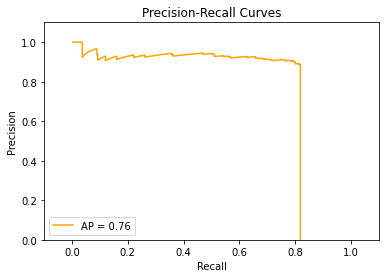

Average precision-recall score: 0.74


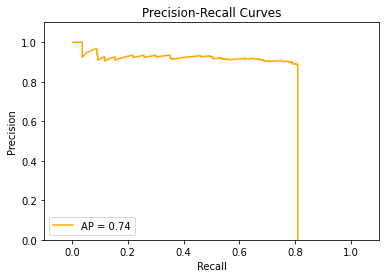

Average precision-recall score: 0.79


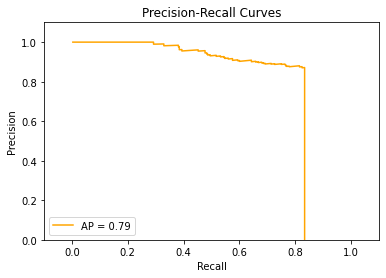

Average precision-recall score: 0.81


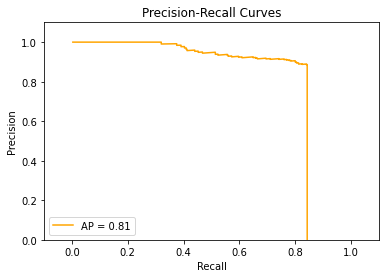

Average precision-recall score: 0.81


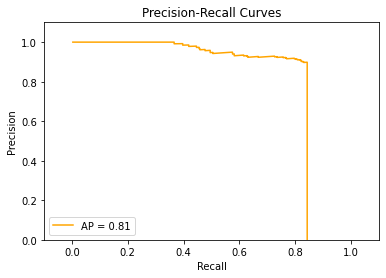

Average precision-recall score: 0.82


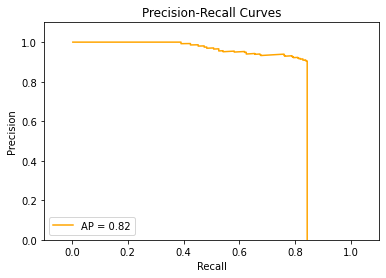

Average precision-recall score: 0.82


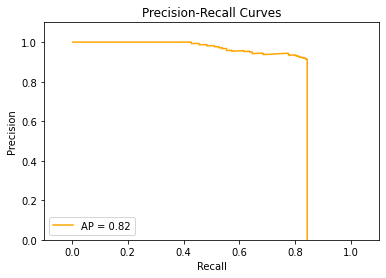

Average precision-recall score: 0.82


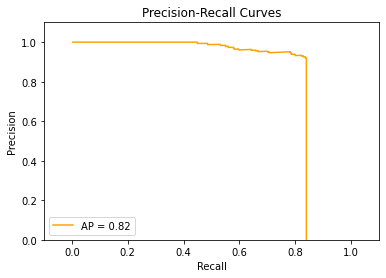

Average precision-recall score: 0.83


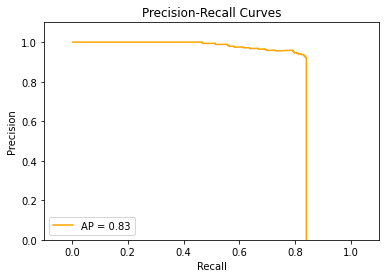

Average precision-recall score: 0.83


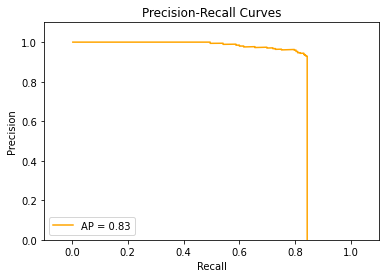

Average precision-recall score: 0.83


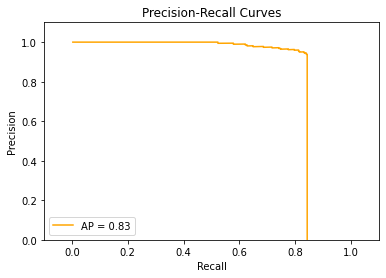

Average precision-recall score: 0.83


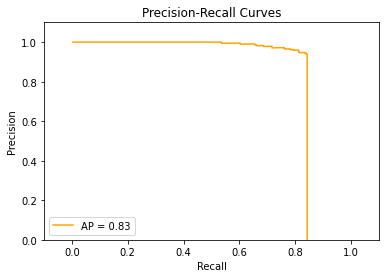

Average precision-recall score: 0.83


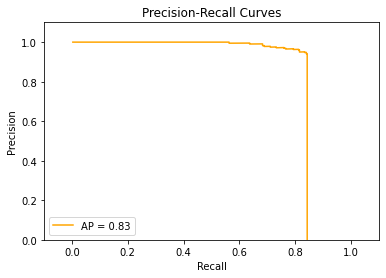

Average precision-recall score: 0.83


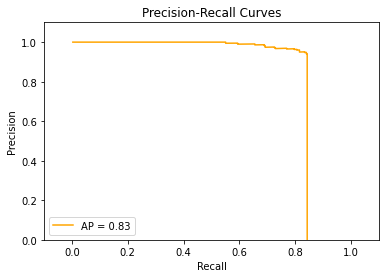

Average precision-recall score: 0.83


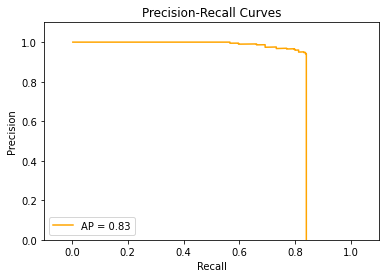

Average precision-recall score: 0.82


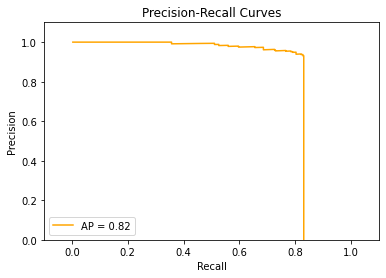

Average precision-recall score: 0.81


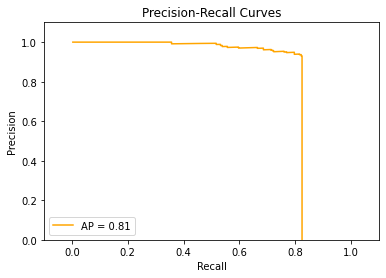

Average precision-recall score: 0.80


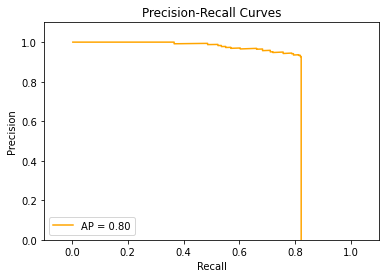

Average precision-recall score: 0.80


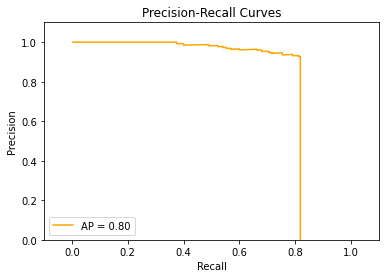

Average precision-recall score: 0.77


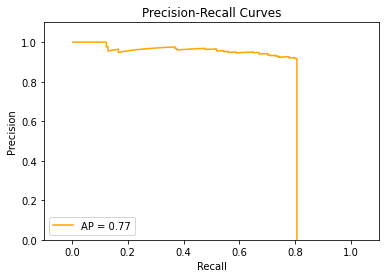

Average precision-recall score: 0.77


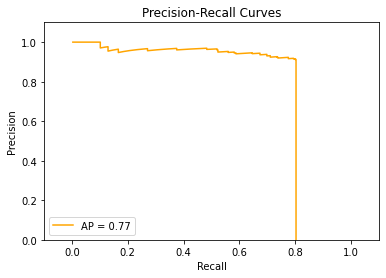

Average precision-recall score: 0.75


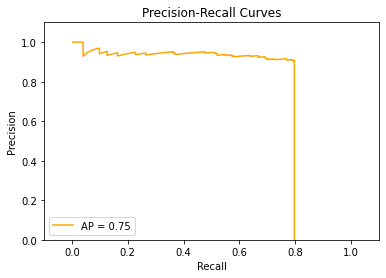

Average precision-recall score: 0.74


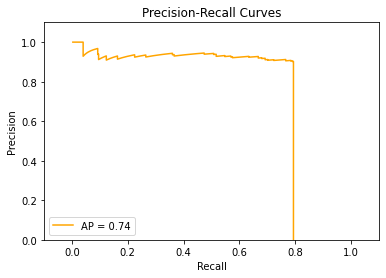

Average precision-recall score: 0.74


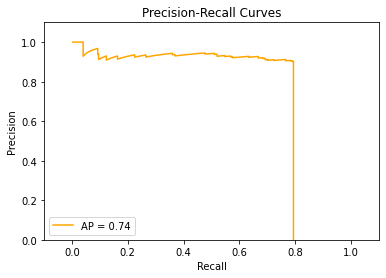

Average precision-recall score: 0.72


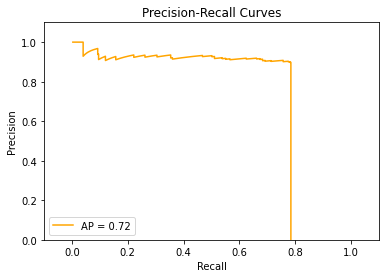

Average precision-recall score: 0.79


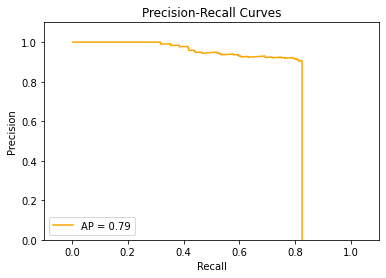

Average precision-recall score: 0.80


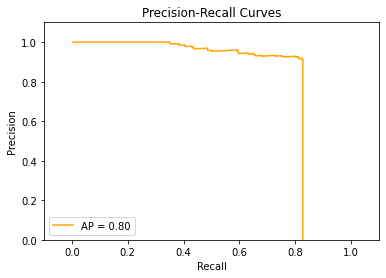

Average precision-recall score: 0.80


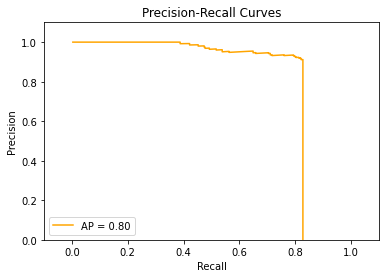

Average precision-recall score: 0.81


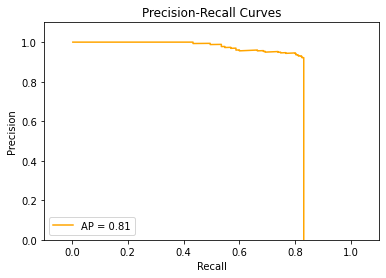

Average precision-recall score: 0.82


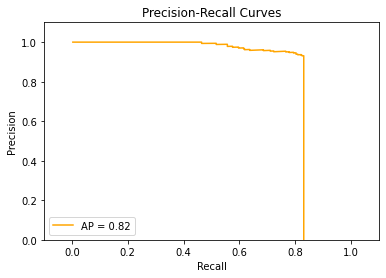

Average precision-recall score: 0.82


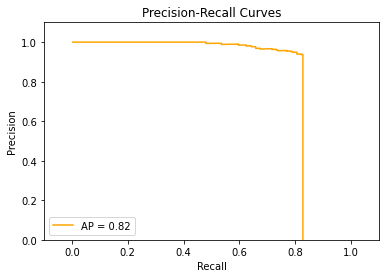

Average precision-recall score: 0.82


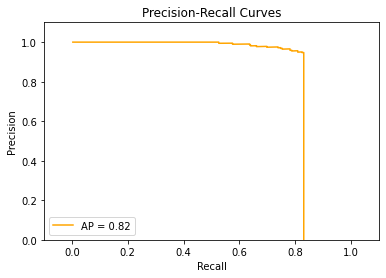

Average precision-recall score: 0.82


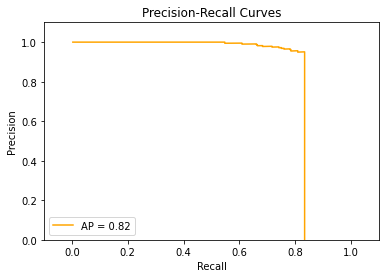

Average precision-recall score: 0.83


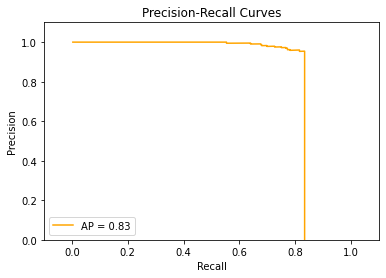

Average precision-recall score: 0.83


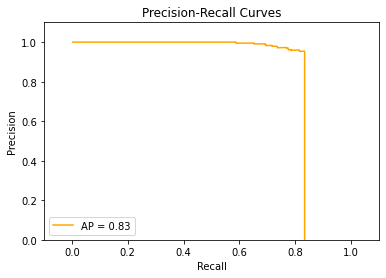

Average precision-recall score: 0.83


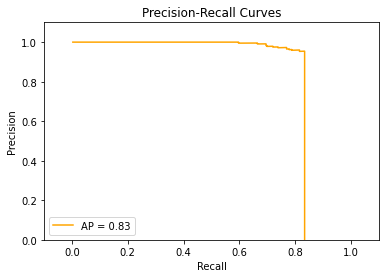

Average precision-recall score: 0.82


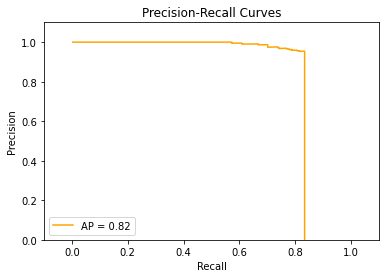

Average precision-recall score: 0.82


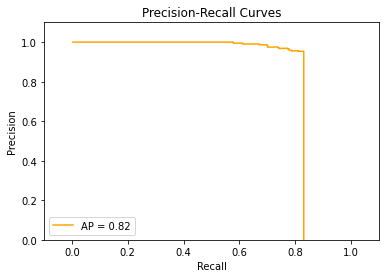

Average precision-recall score: 0.81


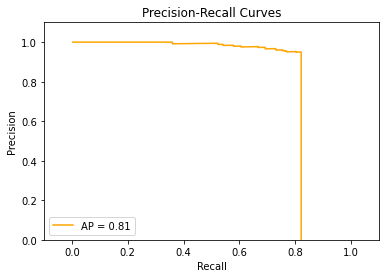

Average precision-recall score: 0.80


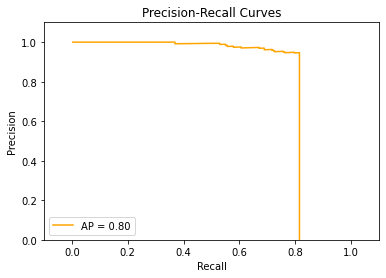

Average precision-recall score: 0.80


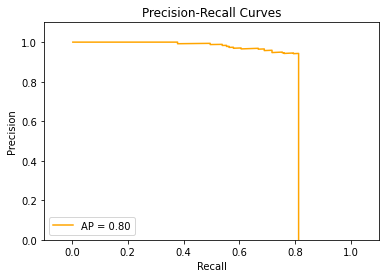

Average precision-recall score: 0.80


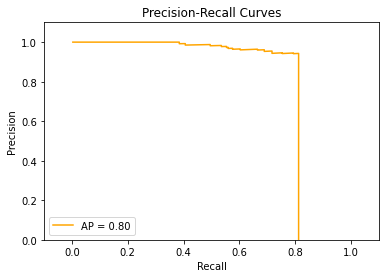

Average precision-recall score: 0.77


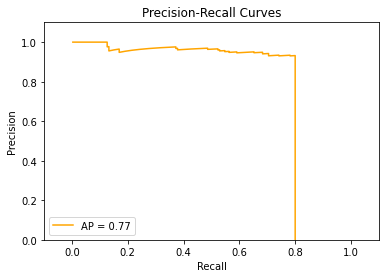

Average precision-recall score: 0.76


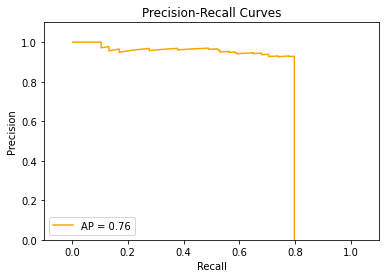

Average precision-recall score: 0.74


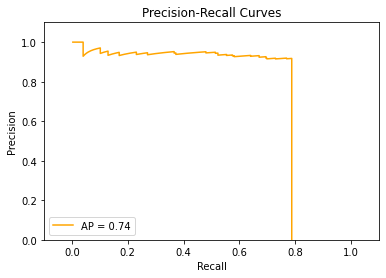

Average precision-recall score: 0.73


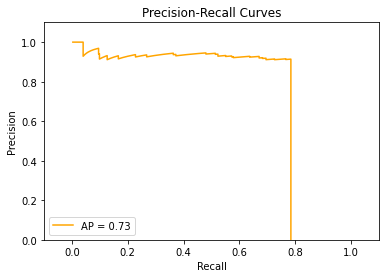

Average precision-recall score: 0.73


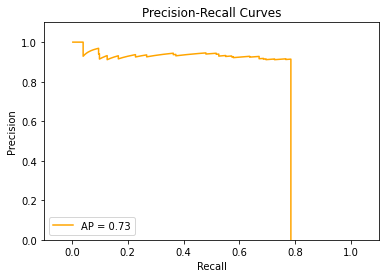

Average precision-recall score: 0.72


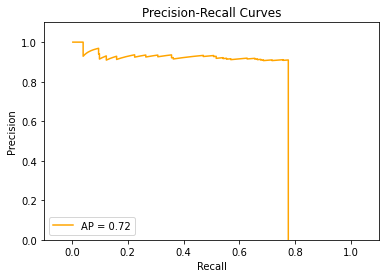

Average precision-recall score: 0.79


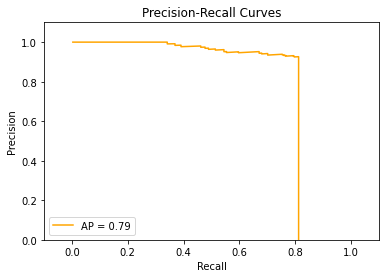

Average precision-recall score: 0.79


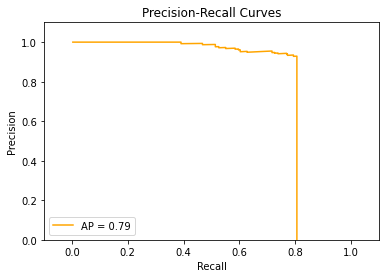

Average precision-recall score: 0.79


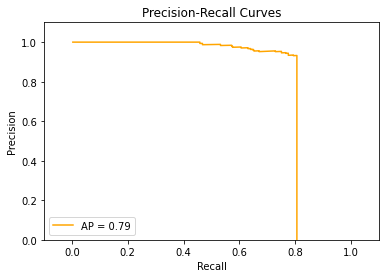

Average precision-recall score: 0.80


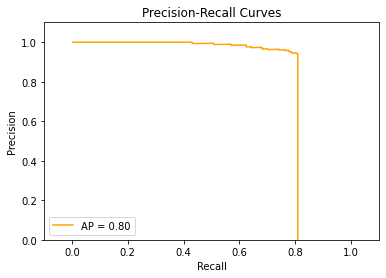

Average precision-recall score: 0.80


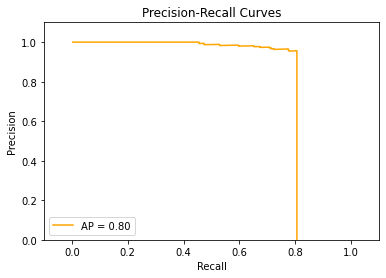

Average precision-recall score: 0.79


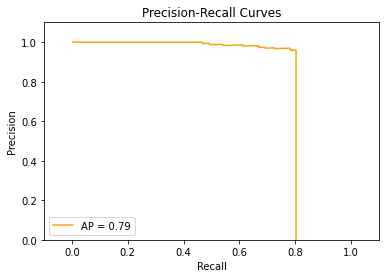

Average precision-recall score: 0.79


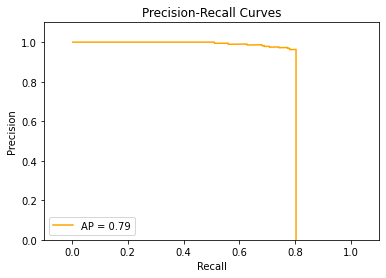

Average precision-recall score: 0.80


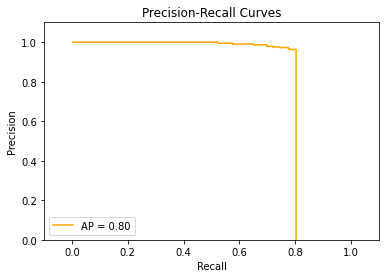

Average precision-recall score: 0.80


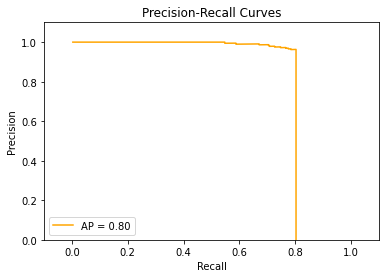

Average precision-recall score: 0.80


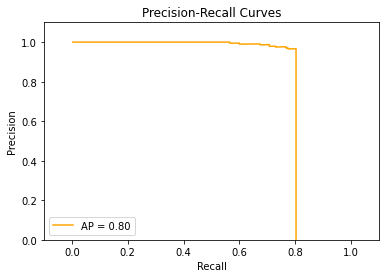

Average precision-recall score: 0.80


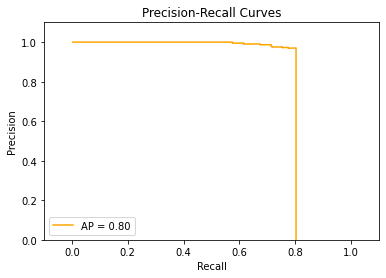

Average precision-recall score: 0.80


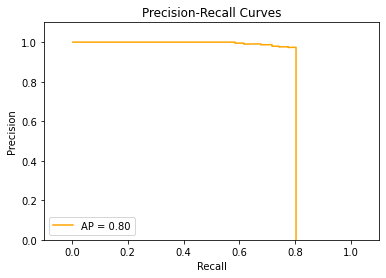

Average precision-recall score: 0.79


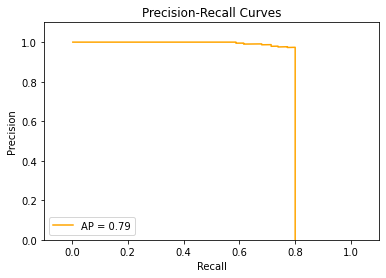

Average precision-recall score: 0.78


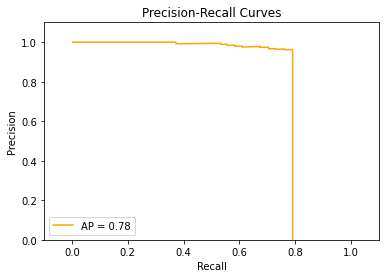

Average precision-recall score: 0.77


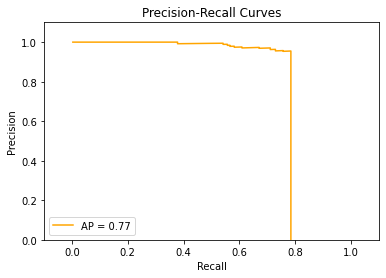

Average precision-recall score: 0.77


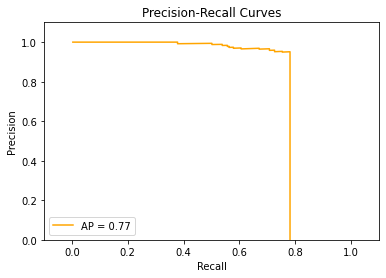

Average precision-recall score: 0.76


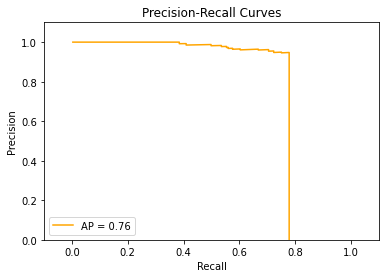

Average precision-recall score: 0.74


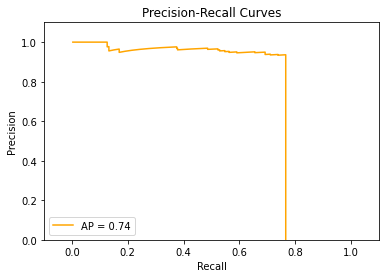

Average precision-recall score: 0.73


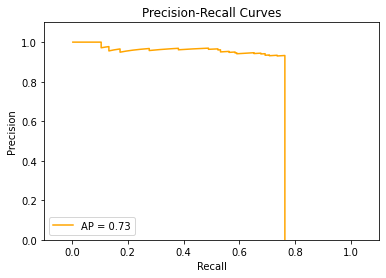

Average precision-recall score: 0.71


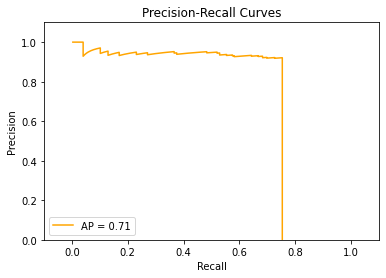

Average precision-recall score: 0.70


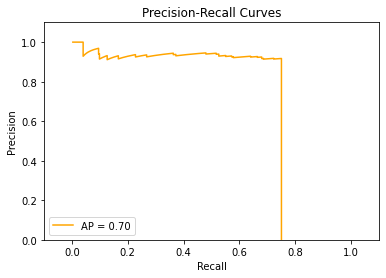

Average precision-recall score: 0.70


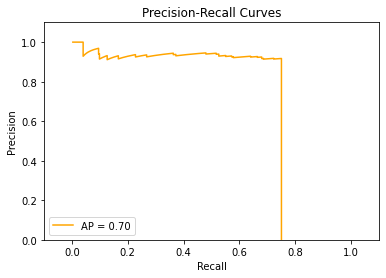

Average precision-recall score: 0.69


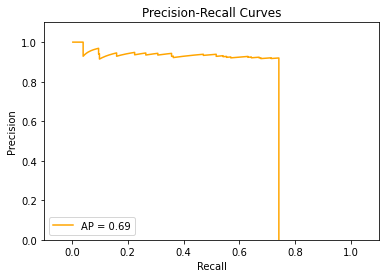

Average precision-recall score: 0.75


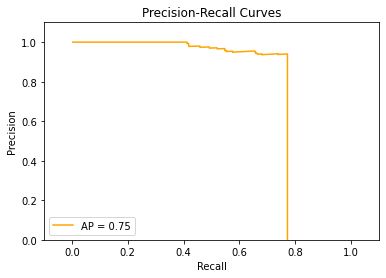

Average precision-recall score: 0.76


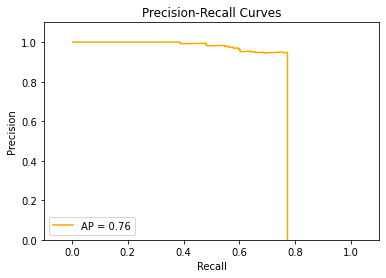

Average precision-recall score: 0.76


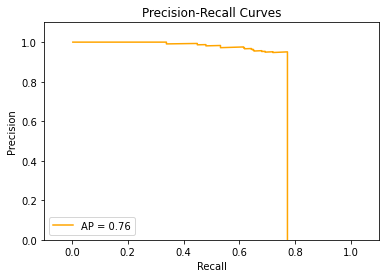

Average precision-recall score: 0.76


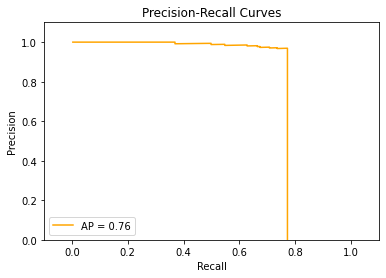

Average precision-recall score: 0.76


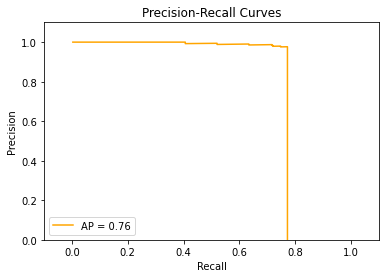

Average precision-recall score: 0.76


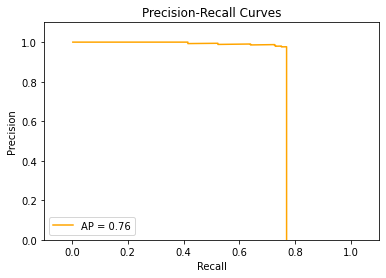

Average precision-recall score: 0.76


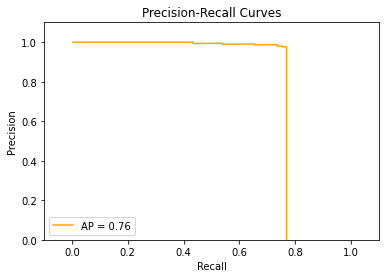

Average precision-recall score: 0.76


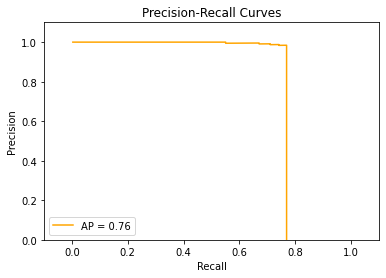

Average precision-recall score: 0.76


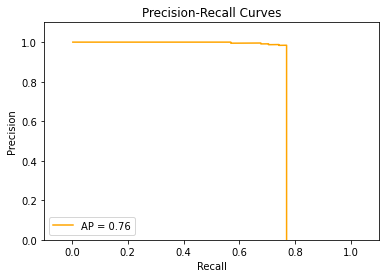

Average precision-recall score: 0.76


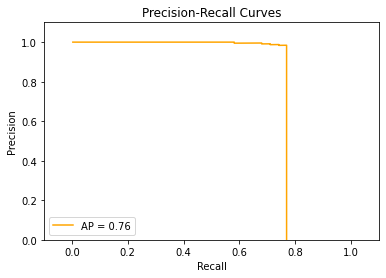

Average precision-recall score: 0.76


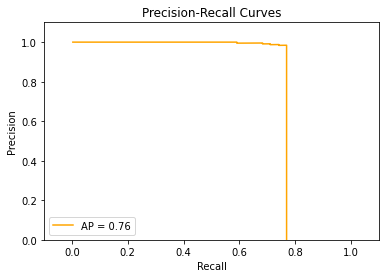

Average precision-recall score: 0.76


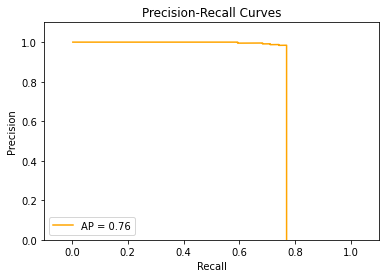

Average precision-recall score: 0.76


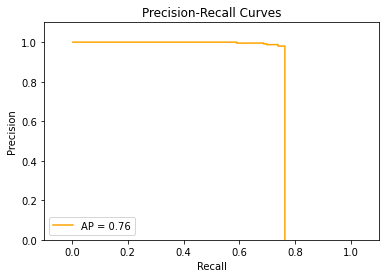

Average precision-recall score: 0.75


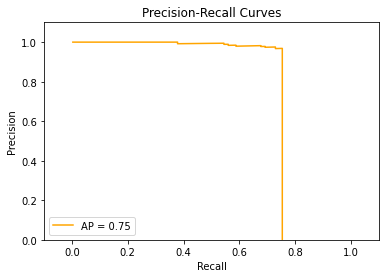

Average precision-recall score: 0.74


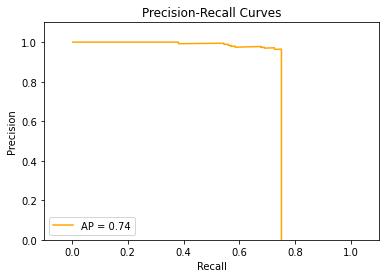

Average precision-recall score: 0.74


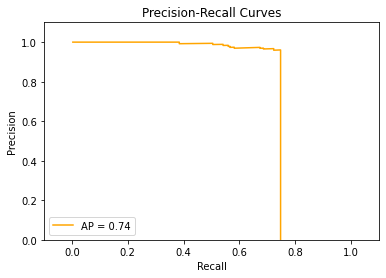

Average precision-recall score: 0.73


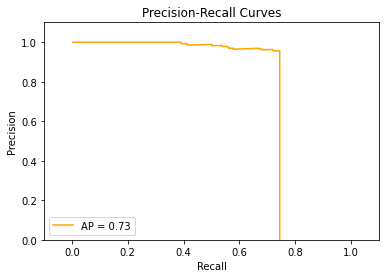

Average precision-recall score: 0.71


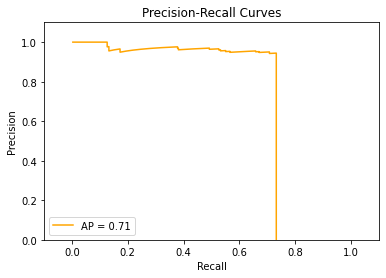

Average precision-recall score: 0.70


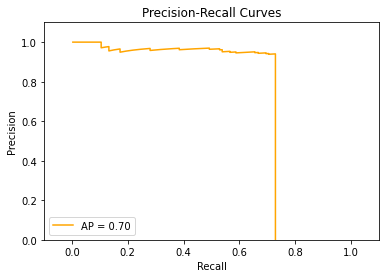

Average precision-recall score: 0.68


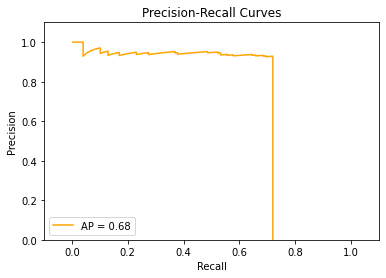

Average precision-recall score: 0.67


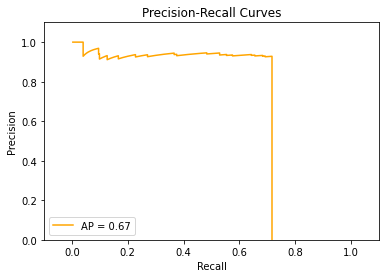

Average precision-recall score: 0.67


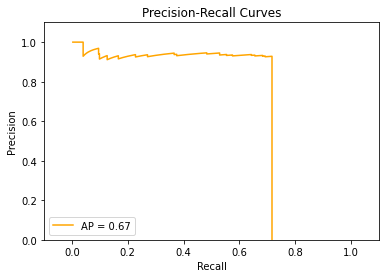

Average precision-recall score: 0.66


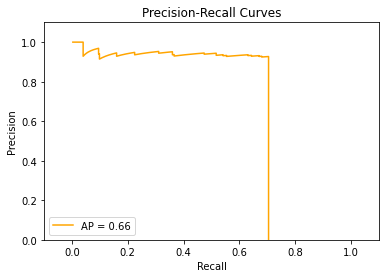

Average precision-recall score: 0.71


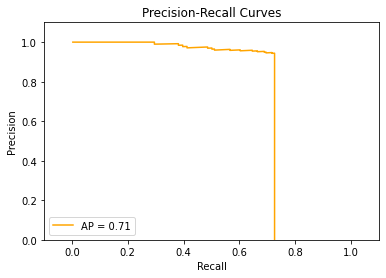

Average precision-recall score: 0.71


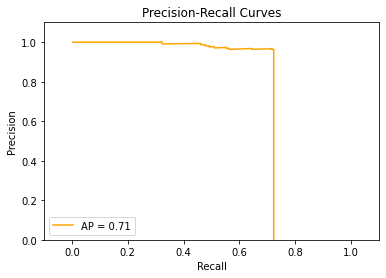

Average precision-recall score: 0.71


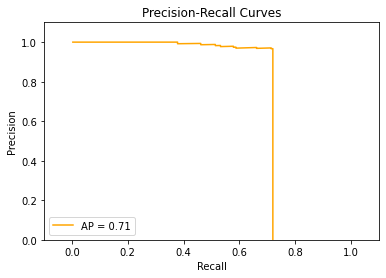

Average precision-recall score: 0.71


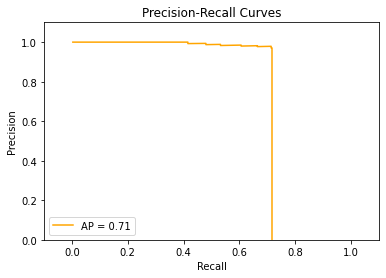

Average precision-recall score: 0.71


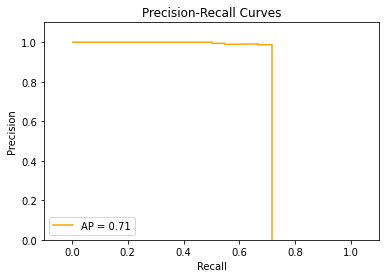

Average precision-recall score: 0.71


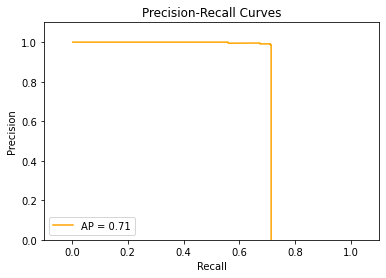

Average precision-recall score: 0.71


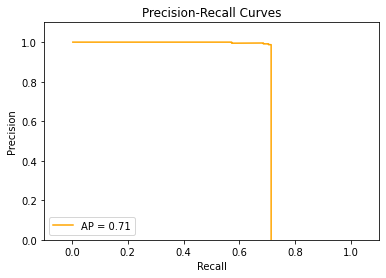

Average precision-recall score: 0.71


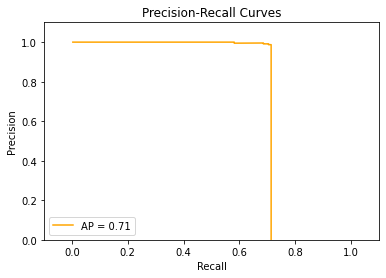

Average precision-recall score: 0.71


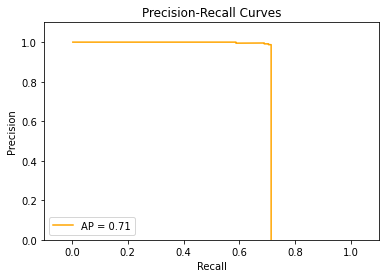

Average precision-recall score: 0.71


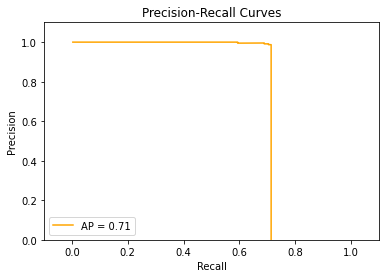

Average precision-recall score: 0.71


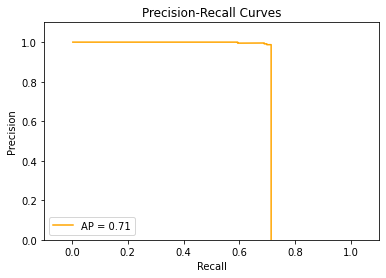

Average precision-recall score: 0.71


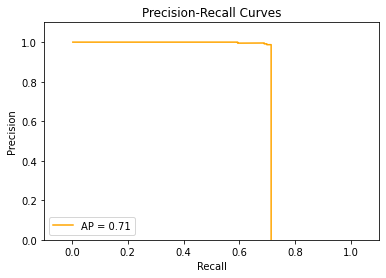

Average precision-recall score: 0.71


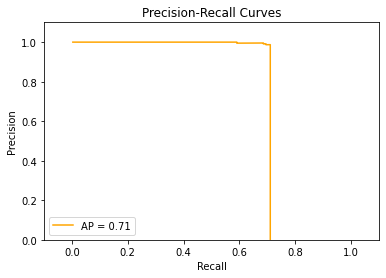

Average precision-recall score: 0.69


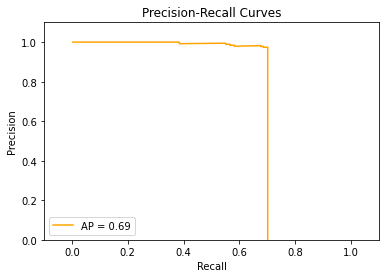

Average precision-recall score: 0.69


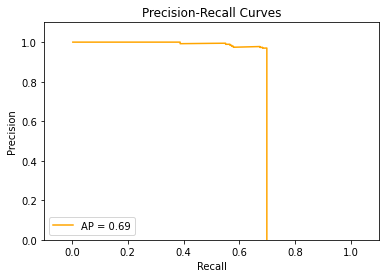

Average precision-recall score: 0.69


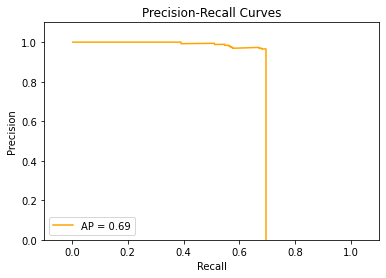

Average precision-recall score: 0.68


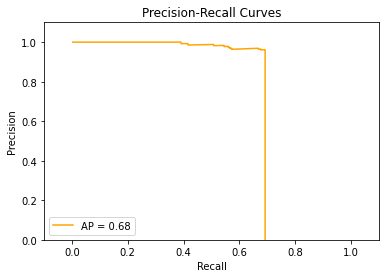

Average precision-recall score: 0.66


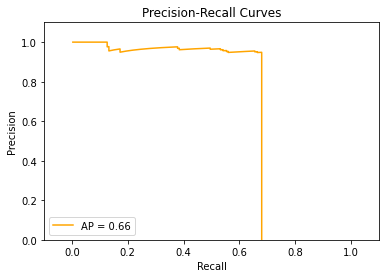

Average precision-recall score: 0.65


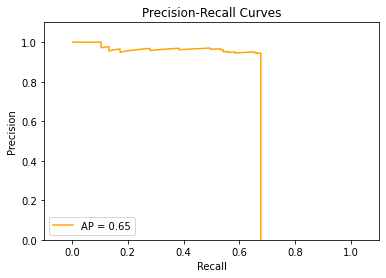

Average precision-recall score: 0.63


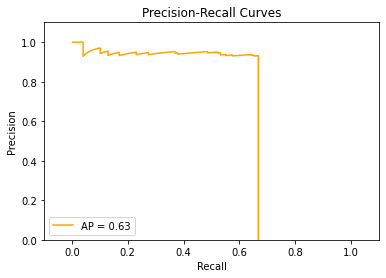

Average precision-recall score: 0.63


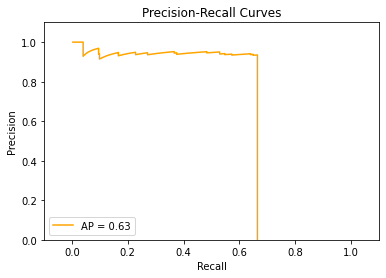

Average precision-recall score: 0.63


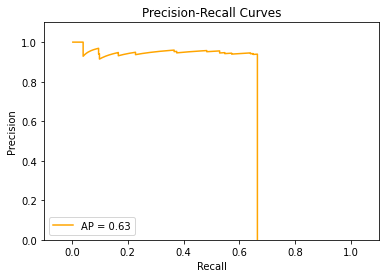

Average precision-recall score: 0.61


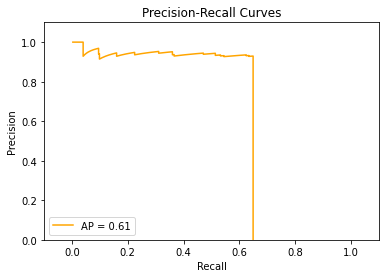

Average precision-recall score: 0.61


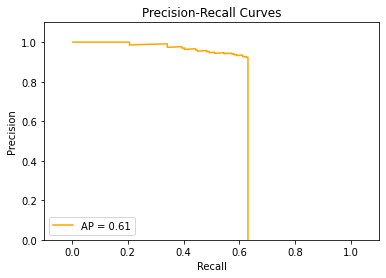

Average precision-recall score: 0.62


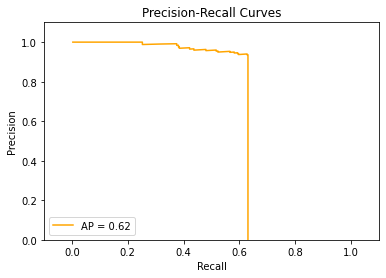

Average precision-recall score: 0.62


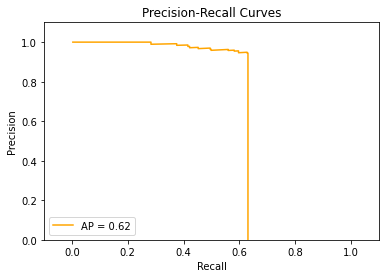

Average precision-recall score: 0.62


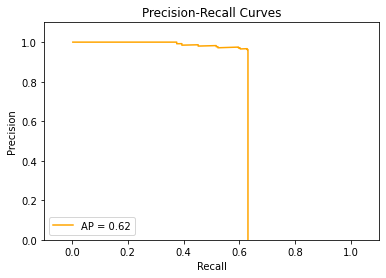

Average precision-recall score: 0.62


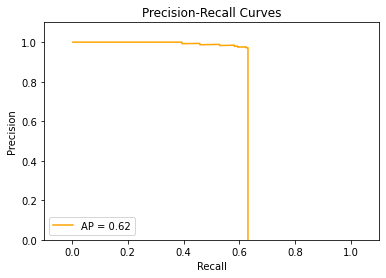

Average precision-recall score: 0.62


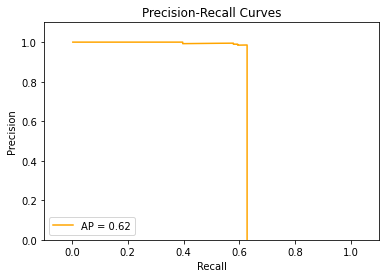

Average precision-recall score: 0.62


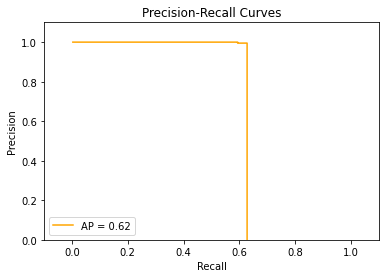

Average precision-recall score: 0.62


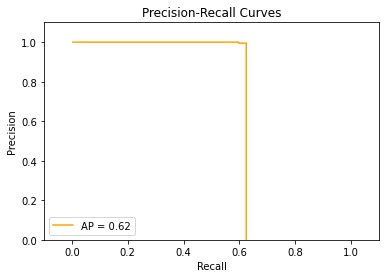

Average precision-recall score: 0.62


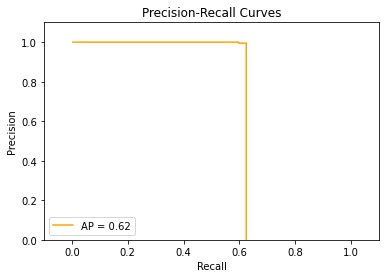

Average precision-recall score: 0.62


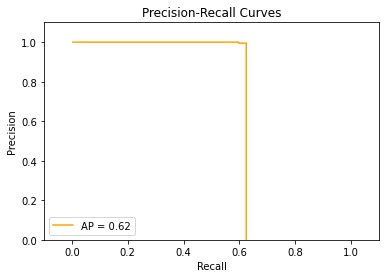

Average precision-recall score: 0.62


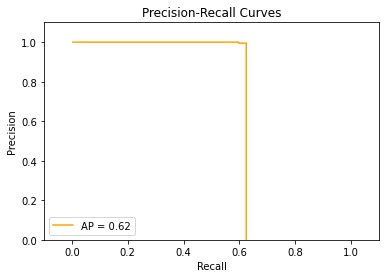

Average precision-recall score: 0.62


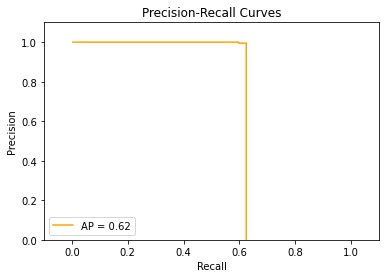

Average precision-recall score: 0.62


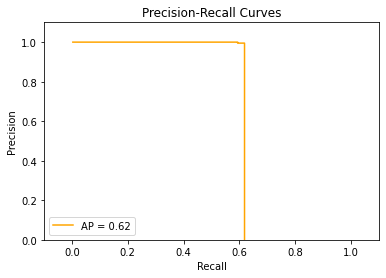

Average precision-recall score: 0.60


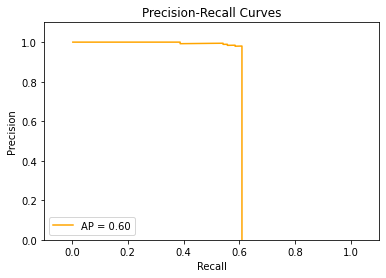

Average precision-recall score: 0.60


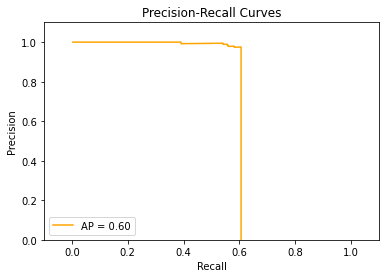

Average precision-recall score: 0.60


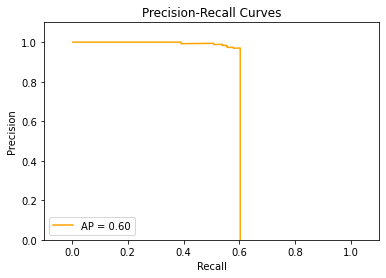

Average precision-recall score: 0.59


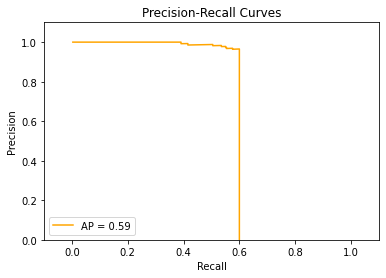

Average precision-recall score: 0.57


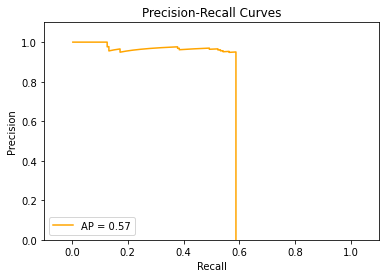

Average precision-recall score: 0.56


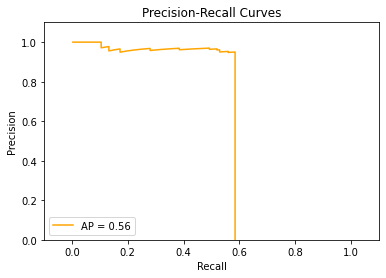

Average precision-recall score: 0.54


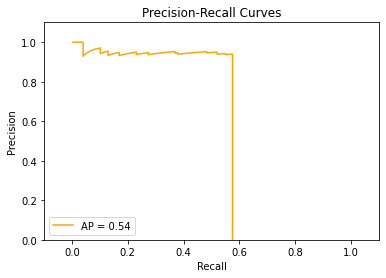

Average precision-recall score: 0.54


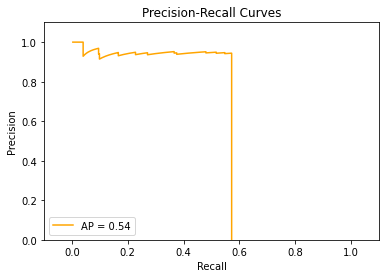

Average precision-recall score: 0.54


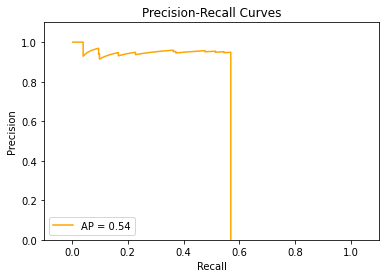

Average precision-recall score: 0.52


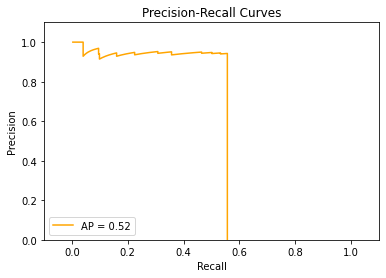

best AP : 0.88381471730261
[0.3500000000000001, 13]


In [141]:
best = [0,0]
max_ap = 0
thred = np.arange(0.1,1.0 , 0.05)
for th in thred:
    for hit in range(3,26):
        _,_,ap = Detect_PR(gesture_validation,th,0.5,hit,5)
        if ap > max_ap:
            best = [th,hit]
            max_ap = ap
print(f"best AP : {max_ap}")
print(best)

Average precision-recall score: 0.88


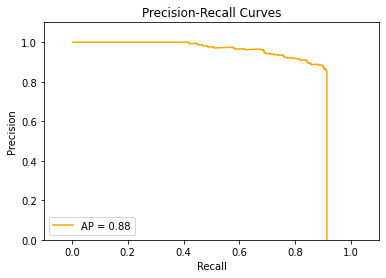

(array([1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.  

In [142]:
Detect_PR(gesture_validation,0.35,0.5,13,5)

hit = 3
Average precision-recall score: 0.79


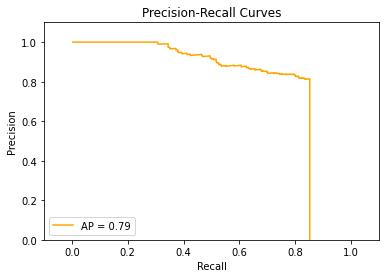

hit = 4
Average precision-recall score: 0.81


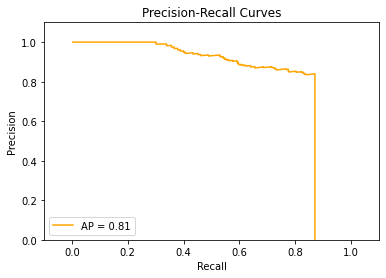

hit = 5
Average precision-recall score: 0.84


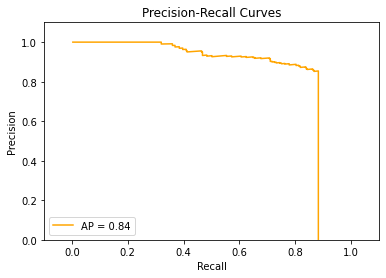

hit = 6
Average precision-recall score: 0.85


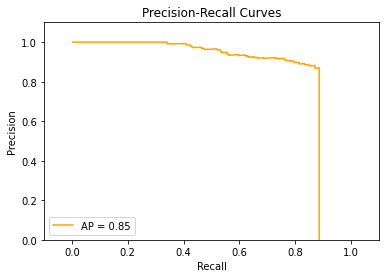

hit = 7
Average precision-recall score: 0.86


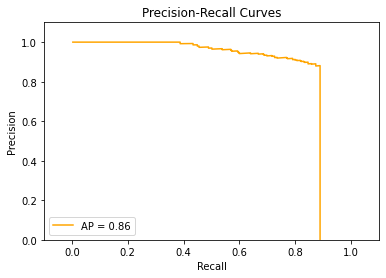

hit = 8
Average precision-recall score: 0.86


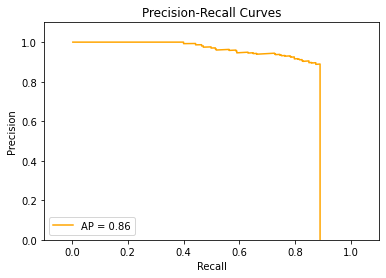

hit = 9
Average precision-recall score: 0.86


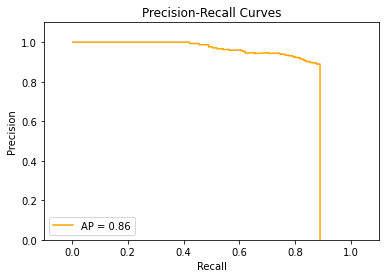

hit = 10
Average precision-recall score: 0.87


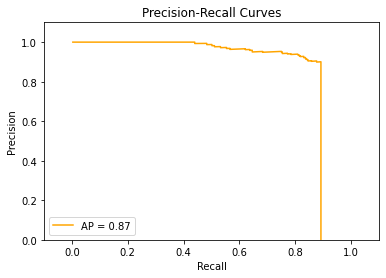

hit = 11
Average precision-recall score: 0.87


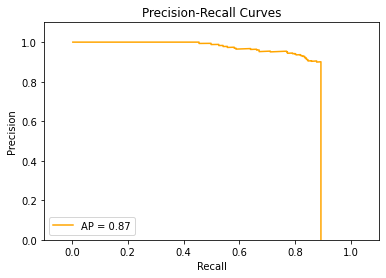

hit = 12
Average precision-recall score: 0.87


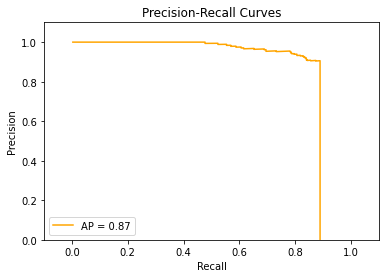

hit = 13
Average precision-recall score: 0.87


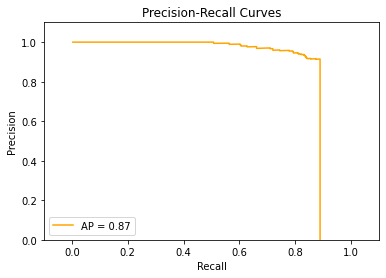

hit = 14
Average precision-recall score: 0.87


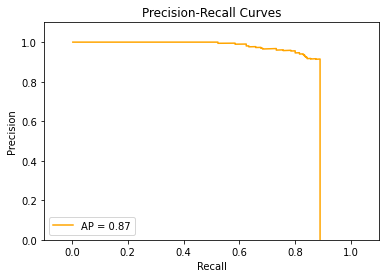

hit = 15
Average precision-recall score: 0.87


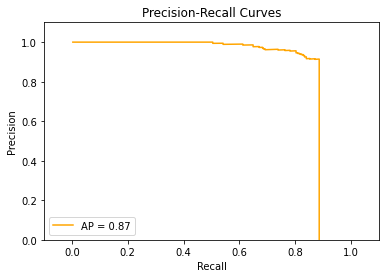

hit = 16
Average precision-recall score: 0.86


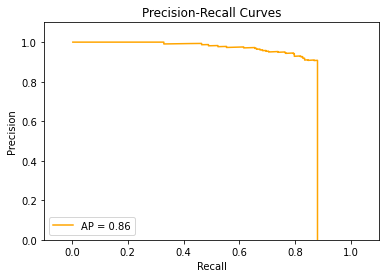

hit = 17
Average precision-recall score: 0.85


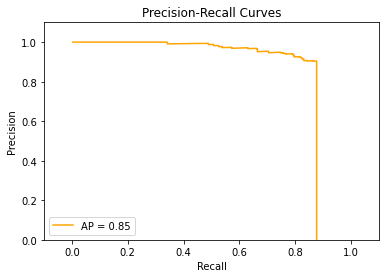

hit = 18
Average precision-recall score: 0.85


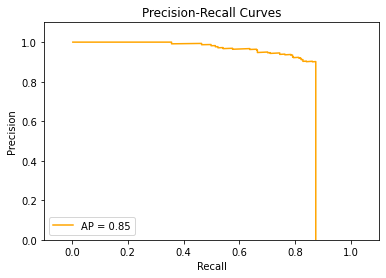

hit = 19
Average precision-recall score: 0.84


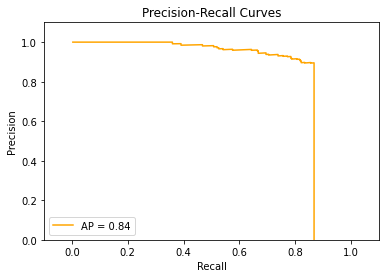

hit = 20
Average precision-recall score: 0.81


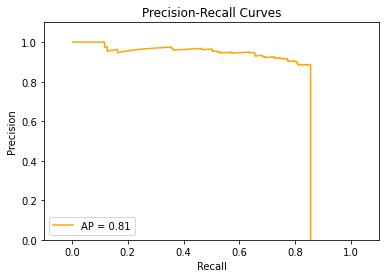

hit = 21
Average precision-recall score: 0.81


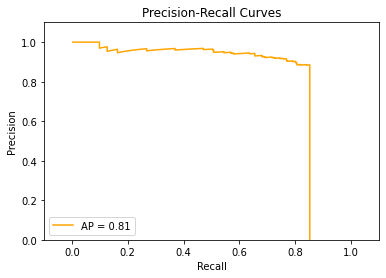

hit = 22
Average precision-recall score: 0.79


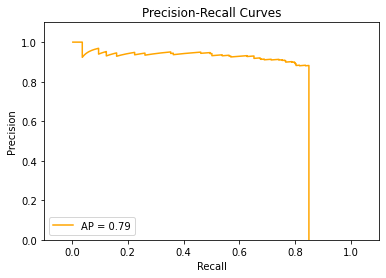

hit = 23
Average precision-recall score: 0.78


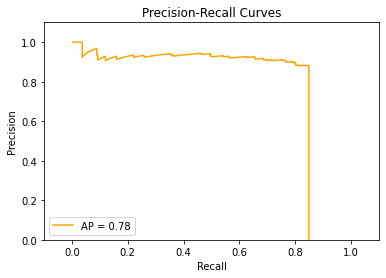

hit = 24
Average precision-recall score: 0.79


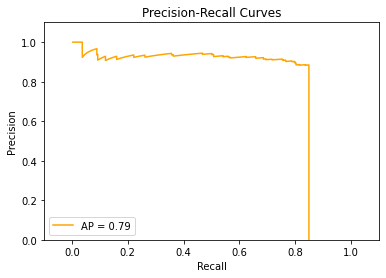

hit = 25
Average precision-recall score: 0.77


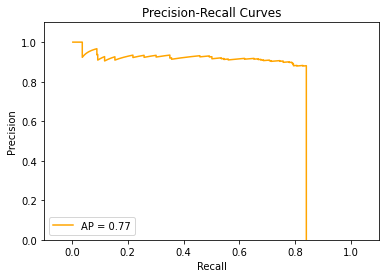

In [138]:

for hit in range(3,26):
    print(f"hit = {hit}")
    Detect_PR(gesture_validation,0.6,0.5,hit,5)

iou = 0.5
Average precision-recall score: 0.84


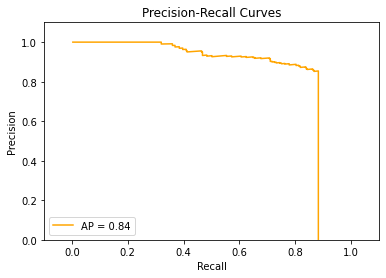

iou = 0.55
Average precision-recall score: 0.84


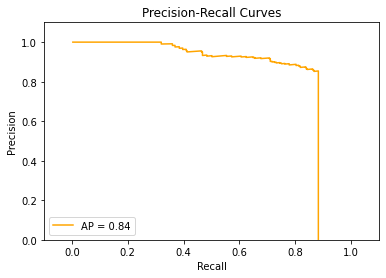

iou = 0.6000000000000001
Average precision-recall score: 0.84


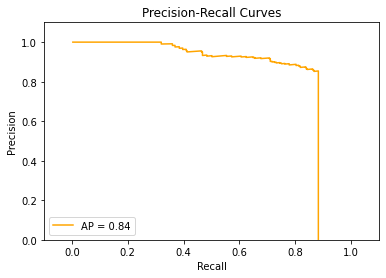

iou = 0.6500000000000001
Average precision-recall score: 0.84


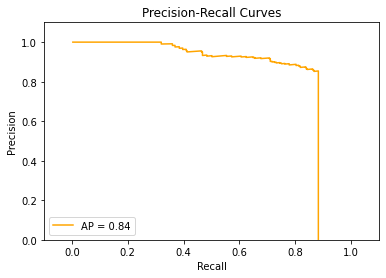

iou = 0.7000000000000002
Average precision-recall score: 0.84


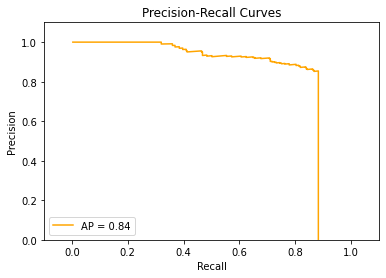

iou = 0.7500000000000002
Average precision-recall score: 0.84


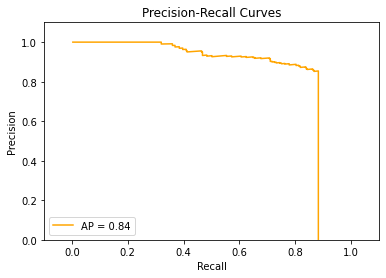

iou = 0.8000000000000003
Average precision-recall score: 0.84


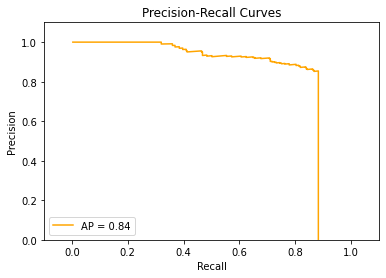

iou = 0.8500000000000003
Average precision-recall score: 0.84


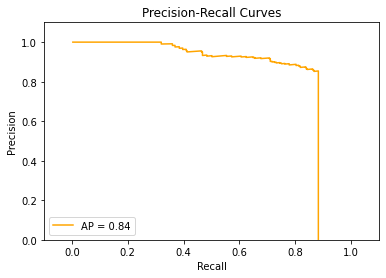

iou = 0.9000000000000004
Average precision-recall score: 0.84


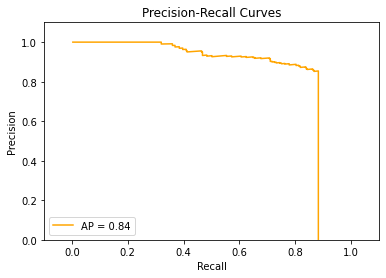

iou = 0.9500000000000004
Average precision-recall score: 0.84


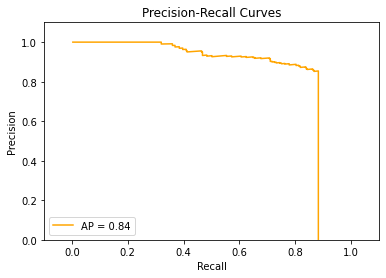

In [90]:
for iou in np.arange(0.5,1.0 , 0.05):
    print(f"iou = {iou}")
    Detect_PR(gesture_validation,0.6,0.5,5,5)

[0.1, 0.15000000000000002, 0.20000000000000004, 0.25000000000000006, 0.30000000000000004, 0.3500000000000001, 0.40000000000000013, 0.45000000000000007, 0.5000000000000001, 0.5500000000000002, 0.6000000000000002, 0.6500000000000001, 0.7000000000000002, 0.7500000000000002, 0.8000000000000002, 0.8500000000000002, 0.9000000000000002, 0.9500000000000003]
th = 0.1
Average precision-recall score: 0.63


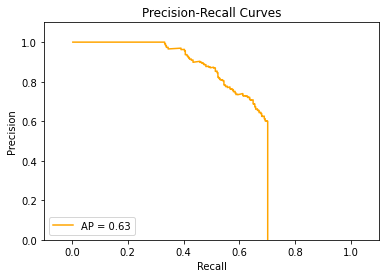

th = 0.15000000000000002
Average precision-recall score: 0.64


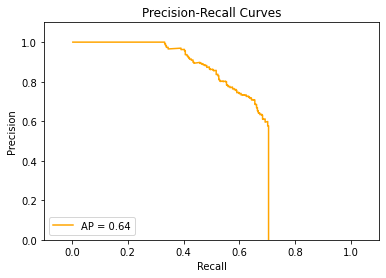

th = 0.20000000000000004
Average precision-recall score: 0.65


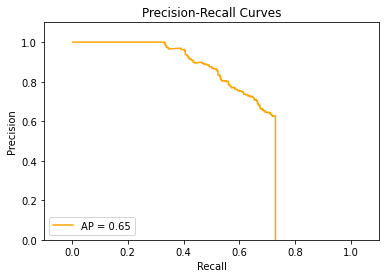

th = 0.25000000000000006
Average precision-recall score: 0.66


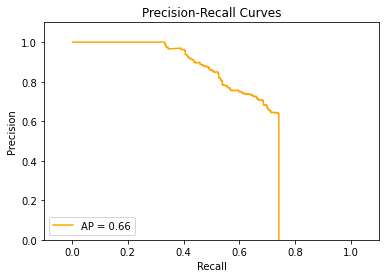

th = 0.30000000000000004
Average precision-recall score: 0.69


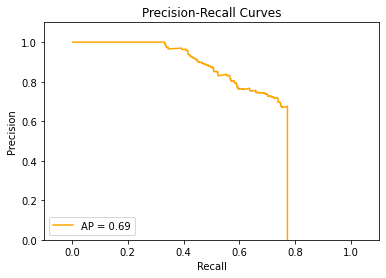

th = 0.3500000000000001
Average precision-recall score: 0.74


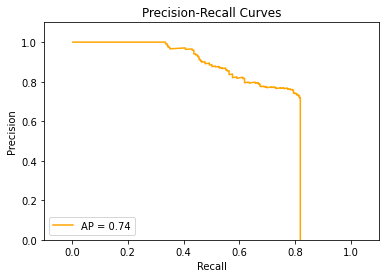

th = 0.40000000000000013
Average precision-recall score: 0.77


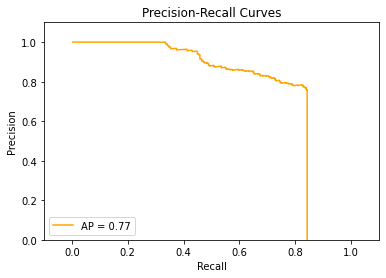

th = 0.45000000000000007
Average precision-recall score: 0.79


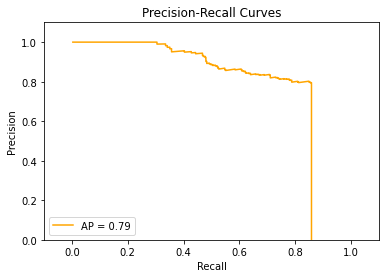

th = 0.5000000000000001
Average precision-recall score: 0.82


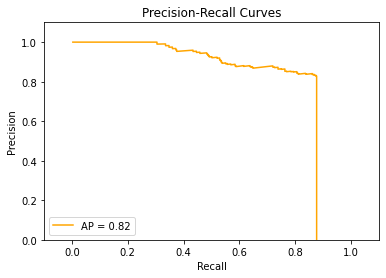

th = 0.5500000000000002
Average precision-recall score: 0.82


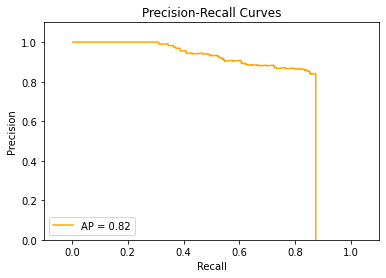

th = 0.6000000000000002
Average precision-recall score: 0.84


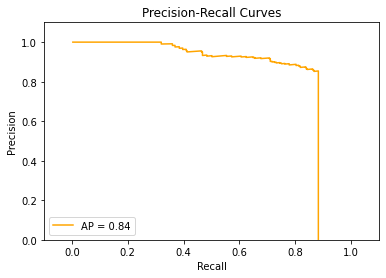

th = 0.6500000000000001
Average precision-recall score: 0.82


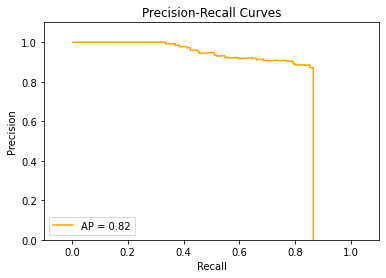

th = 0.7000000000000002
Average precision-recall score: 0.81


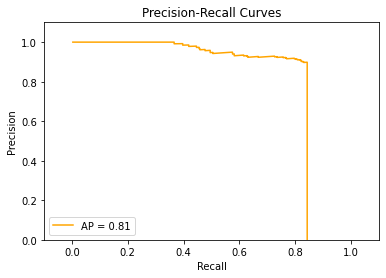

th = 0.7500000000000002
Average precision-recall score: 0.80


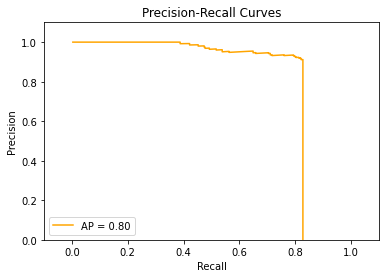

th = 0.8000000000000002
Average precision-recall score: 0.79


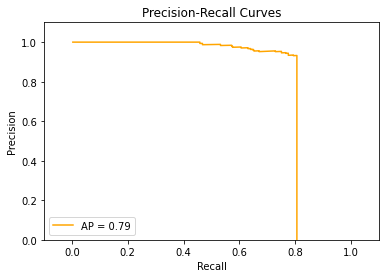

th = 0.8500000000000002
Average precision-recall score: 0.76


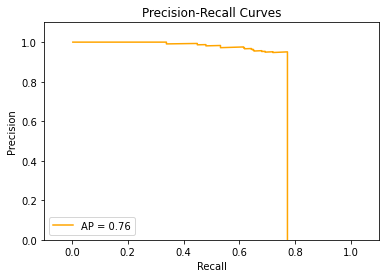

th = 0.9000000000000002
Average precision-recall score: 0.71


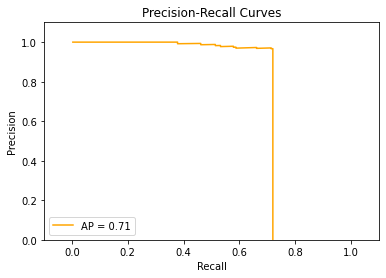

th = 0.9500000000000003
Average precision-recall score: 0.62


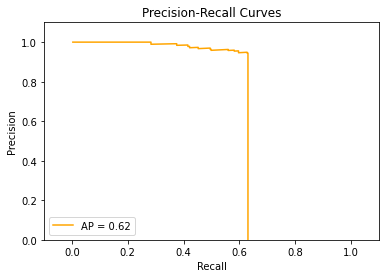

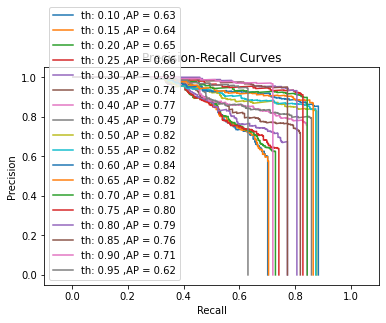

In [91]:
ps ,rs , AP = list(),list(),list()
thred = np.arange(0.1,1.0 , 0.05)
print(thred)
for th in thred:
    print(f"th = {th}")
    p,r,s = Detect_PR(gesture_validation,th,0.5,5,5)
    ps.append(p)
    rs.append(r)
    AP.append(s)


# print("Average precision-recall score: {:.2f}".format(np.mean(AP)))
plt.title('Precision-Recall Curves')
for i,precision,recall,average_precision in zip(thred,ps ,rs , AP):
    plt.plot(recall, precision,label = 'th: {1:0.2f} ,AP = {0:0.2f}'.format(average_precision,i))

plt.legend(loc = 'lower left')
plt.xlim([-0.1, 1.1])
# plt.ylim([0, 1.1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()  

Average precision-recall score: 0.80


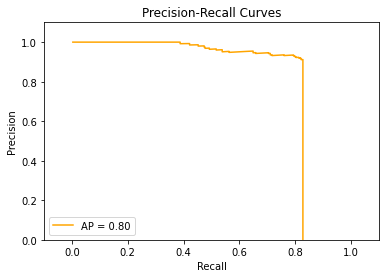

In [11]:
Detect_PR(gesture_validation,0.75,0.5,5,5)

In [94]:
def Classify_PR(Gesture,threshold,iou_threshold,hit_threshold,interval,gesture_class,debug=False):
    
    
    res_true = list()
    res_pred = list()
    total_ground_truth = 0
    
    for validation_data in Gesture.predict_data:
        if debug:
            print("*"*50)
#         print(validation_data['label_index'])
#         y_true,y_pred,y_pred_mid,pred_index,y_pred_c = Result_process(validation_data['data'],threshold,iou_threshold,hit_threshold,debug=debug)
        y_true,y_pred,y_pred_mid,pred_index,y_pred_c = Result_process(validation_data['data'],threshold,iou_threshold,hit_threshold)
        if debug:
            print(pred_index)
#         ground_truth = validation_data['label'].copy()
        for truth_class in validation_data['class_name']:
#             print(type(truth_class),type(gesture_class),truth_class == gesture_class)
            if int(truth_class) == gesture_class:
                total_ground_truth += 1
        
        for i in range(len(pred_index)):
            # pred outcome positive
            start_index = pred_index[i]["start_end"][0]
            if i != 0:
                if start_index - pred_index[i-1]["start_end"][1] < interval \
                    and pred_index[i]["class"] ==  pred_index[i-1]["class"] :
                    if debug:
                        print("interval-----------")
                    continue
            
            pred_max_index = np.argmax(y_pred[start_index:start_index+hit_threshold]) + start_index
            if debug:
                print(f"Index : {pred_max_index}")
#             print(y_pred_mid)
#             print(list(enumerate(validation_data['g_truth_class'])))
            print(y_pred_c[pred_max_index],int(validation_data['g_truth_class'][int(y_pred_mid[pred_max_index])+start_index]))
            if y_pred_c[pred_max_index] == int(validation_data['g_truth_class'][int(y_pred_mid[pred_max_index])+start_index]):
                if y_pred_c[pred_max_index] == gesture_class:
                    res_pred.append(y_pred[pred_max_index])
                    res_true.append(y_true[pred_max_index])
                    if debug:
                        print('true class')
                        print(y_true[pred_max_index],y_pred[pred_max_index])
            else:
                if y_pred_c[pred_max_index] == gesture_class:
                    res_pred.append(y_pred[pred_max_index])
                    res_true.append(0)
                    if debug:
                        print('wrong class')
                        print(0,y_pred[pred_max_index])
        if debug:
#             print(res_true)
#             print(res_pred)
            print("*"*50)
    # PR curve
    print(res_true)
    print(res_pred)
    Acc_TP,Acc_FP = 0,0
    precision, recall = list(),list()
    for t,p in sorted(zip(res_true,res_pred),key=lambda x:x[1],reverse=True):
        if t == 1:
            Acc_TP += 1
        else:
            Acc_FP += 1
        
        precision.append(Acc_TP/(Acc_TP+Acc_FP))
        recall.append(Acc_TP/total_ground_truth)
    
    precision.append(0)
    recall.append(recall[-1])
    
    recall = np.array(recall)
    precision = np.array(precision)
    average_precision = np.sum((recall[1:] - recall[:-1]) * precision[:-1])
    if debug:
        print(len(res_true))
    
#     precision, recall, thresholds = precision_recall_curve(res_true,res_pred)
#     average_precision = average_precision_score(res_true,res_pred)
    
#     precision = np.insert(precision,0,0)
#     recall = np.insert(recall,0,1)
    
    
    if debug:
        print(precision)
        print(recall)
#     print(thresholds)
    print('precision-recall score: {0:0.2f}'.format(average_precision))
    
    return precision,recall,average_precision

**************************************************
[]
**************************************************
**************************************************
[{'start_end': [0, 86], 'class': 2}, {'start_end': [87, 179], 'class': 3}]
Index : 2
2 0
Index : 91
3 0
**************************************************
**************************************************
[]
**************************************************
**************************************************
[]
**************************************************
**************************************************
[]
**************************************************
**************************************************
[]
**************************************************
**************************************************
[]
**************************************************
**************************************************
[]
**************************************************
**************************************************
[]
*****

1 1
true class
1 0.8188737
**************************************************
**************************************************
[{'start_end': [18, 106], 'class': 4}, {'start_end': [118, 200], 'class': 4}]
Index : 22
4 4
Index : 122
4 4
**************************************************
**************************************************
[{'start_end': [14, 173], 'class': 4}]
Index : 18
4 4
**************************************************
**************************************************
[{'start_end': [3, 95], 'class': 4}, {'start_end': [96, 163], 'class': 3}]
Index : 6
4 4
Index : 99
3 5
**************************************************
**************************************************
[{'start_end': [29, 102], 'class': 3}, {'start_end': [103, 181], 'class': 1}]
Index : 32
3 5
Index : 107
1 1
true class
1 1.0471704
**************************************************
**************************************************
[{'start_end': [20, 97], 'class': 3}, {'start_end': [110, 190], 

3 0
**************************************************
**************************************************
[]
**************************************************
**************************************************
[]
**************************************************
**************************************************
[]
**************************************************
**************************************************
[]
**************************************************
**************************************************
[]
**************************************************
**************************************************
[]
**************************************************
**************************************************
[]
**************************************************
**************************************************
[]
**************************************************
**************************************************
[]
**************************************************


**************************************************
**************************************************
[{'start_end': [8, 96], 'class': 5}]
Index : 12
5 5
**************************************************
**************************************************
[{'start_end': [0, 79], 'class': 5}]
Index : 4
5 5
**************************************************
**************************************************
[{'start_end': [50, 123], 'class': 5}]
Index : 54
5 5
**************************************************
**************************************************
[{'start_end': [19, 97], 'class': 5}]
Index : 23
5 5
**************************************************
**************************************************
[{'start_end': [11, 93], 'class': 5}]
Index : 15
5 5
**************************************************
**************************************************
[{'start_end': [10, 106], 'class': 5}]
Index : 14
5 5
**************************************************
********************

Index : 300
1 1
**************************************************
**************************************************
[{'start_end': [82, 161], 'class': 1}, {'start_end': [195, 250], 'class': 5}, {'start_end': [303, 369], 'class': 5}, {'start_end': [398, 481], 'class': 1}]
Index : 86
1 1
Index : 196
5 5
Index : 307
5 5
Index : 402
1 1
**************************************************
**************************************************
[{'start_end': [3, 86], 'class': 2}, {'start_end': [87, 164], 'class': 1}, {'start_end': [165, 238], 'class': 2}, {'start_end': [239, 319], 'class': 1}]
Index : 7
2 2
true class
1 0.78523636
Index : 91
1 1
Index : 168
2 2
true class
1 1.0233889
Index : 243
1 1
**************************************************
**************************************************
[{'start_end': [154, 243], 'class': 2}, {'start_end': [268, 347], 'class': 1}, {'start_end': [369, 453], 'class': 2}, {'start_end': [479, 571], 'class': 3}]
Index : 158
2 2
true class
0 0.8627916
In

Index : 138
4 0
wrong class
0 0.7450694
**************************************************
**************************************************
[{'start_end': [7, 16], 'class': 3}, {'start_end': [103, 111], 'class': 3}]
Index : 9
3 0
Index : 105
3 0
**************************************************
**************************************************
[{'start_end': [22, 86], 'class': 4}, {'start_end': [103, 126], 'class': 2}]
Index : 25
4 0
wrong class
0 0.9905162
Index : 106
2 0
**************************************************
**************************************************
[{'start_end': [1, 81], 'class': 3}]
Index : 5
3 0
**************************************************
**************************************************
[]
**************************************************
**************************************************
[{'start_end': [68, 77], 'class': 3}]
Index : 69
3 0
**************************************************
**************************************************
[{'

[{'start_end': [0, 60], 'class': 1}, {'start_end': [76, 82], 'class': 3}, {'start_end': [86, 162], 'class': 3}]
Index : 2
1 1
Index : 77
3 3
interval-----------
**************************************************
**************************************************
[{'start_end': [91, 170], 'class': 3}]
Index : 95
3 5
**************************************************
**************************************************
[{'start_end': [46, 131], 'class': 2}, {'start_end': [132, 179], 'class': 3}]
Index : 50
2 2
Index : 134
3 3
**************************************************
**************************************************
[{'start_end': [7, 157], 'class': 3}]
Index : 11
3 3
**************************************************
**************************************************
[{'start_end': [19, 107], 'class': 3}, {'start_end': [125, 217], 'class': 4}]
Index : 22
3 3
Index : 129
4 4
true class
1 0.80817735
**************************************************
*******************************

2 2
**************************************************
**************************************************
[{'start_end': [0, 45], 'class': 2}, {'start_end': [46, 126], 'class': 4}, {'start_end': [155, 249], 'class': 3}, {'start_end': [267, 278], 'class': 3}, {'start_end': [284, 364], 'class': 3}]
Index : 3
2 2
Index : 50
4 4
true class
1 1.1176041
Index : 157
3 5
Index : 271
3 3
Index : 288
3 3
**************************************************
**************************************************
[{'start_end': [37, 131], 'class': 2}, {'start_end': [152, 221], 'class': 5}, {'start_end': [236, 322], 'class': 2}, {'start_end': [349, 426], 'class': 1}]
Index : 41
2 2
Index : 155
5 5
Index : 238
2 2
Index : 353
1 1
**************************************************
**************************************************
[{'start_end': [0, 39], 'class': 3}, {'start_end': [56, 139], 'class': 4}, {'start_end': [140, 305], 'class': 2}]
Index : 1
3 3
Index : 60
4 4
true class
1 0.84451836
Index : 144


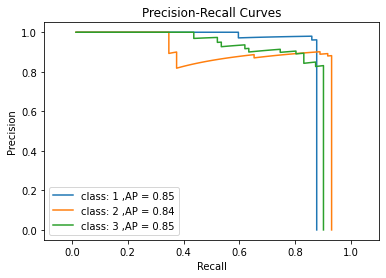

In [96]:
ps ,rs , AP = list(),list(),list()
for c in [1,2,4]:
    p,r,s = Classify_PR(gesture_validation,0.6,0.5,5,5,c,debug=True)
    ps.append(p)
    rs.append(r)
    AP.append(s)

print("Average precision-recall score: {:.2f}".format(np.mean(AP)))
plt.title('Precision-Recall Curves')
for i,(precision,recall,average_precision) in enumerate(zip(ps ,rs , AP)):
    plt.plot(recall, precision,label = 'class: {1} ,AP = {0:0.2f}'.format(average_precision,i+1))

plt.legend(loc = 'lower left')
plt.xlim([-0.1, 1.1])
# plt.ylim([0, 1.1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()  

In [135]:
def Classify_confusion_matrix(Gesture,threshold,iou_threshold,hit_threshold,interval,debug=False):
    res_true = list()
    res_pred = list()
#     total_ground_truth = np.zeros((5,), dtype=int)
    
    for validation_data in Gesture.predict_data:
        if debug:
            print("*"*50)
#         print(validation_data['label_index'])
#         y_true,y_pred,y_pred_mid,pred_index,y_pred_c = Result_process(validation_data['data'],threshold,iou_threshold,hit_threshold,debug=debug)
        y_true,y_pred,y_pred_mid,pred_index,y_pred_c = Result_process(validation_data['data'],threshold,iou_threshold,hit_threshold)
        if debug:
            print(pred_index)
#         ground_truth = validation_data['label'].copy()
        
        
        for i in range(len(pred_index)):
            # pred outcome positive
            start_index = pred_index[i]["start_end"][0]
            if i != 0:
                if start_index - pred_index[i-1]["start_end"][1] < interval \
                    and pred_index[i]["class"] ==  pred_index[i-1]["class"] :
                    if debug:
                        print("interval-----------")
                    continue
            
            pred_max_index = np.argmax(y_pred[start_index:start_index+hit_threshold]) + start_index
            if debug:
                print(f"Index : {pred_max_index}")
#             print(y_pred_mid)
#             print(list(enumerate(validation_data['g_truth_class'])))
#             print(y_pred_c[pred_max_index],int(validation_data['g_truth_class'][int(y_pred_mid[pred_max_index])+start_index]))
            
            if y_true[pred_max_index] != 0:
                res_pred.append(y_pred_c[pred_max_index])
                res_true.append(int(validation_data['g_truth_class'][int(y_pred_mid[pred_max_index])+start_index]))

#             if y_pred_c[pred_max_index] == int(validation_data['g_truth_class'][int(y_pred_mid[pred_max_index])+start_index]):
#                 if y_pred_c[pred_max_index] == gesture_class:
#                     res_pred.append(y_pred[pred_max_index])
#                     res_true.append(y_true[pred_max_index])
#                     if debug:
#                         print('true class')
#                         print(y_true[pred_max_index],y_pred[pred_max_index])
#             else:
#                 if y_pred_c[pred_max_index] == gesture_class:
#                     res_pred.append(y_pred[pred_max_index])
#                     res_true.append(0)
#                     if debug:
#                         print('wrong class')
#                         print(0,y_pred[pred_max_index])
        if debug:
#             print(res_true)
#             print(res_pred)
            print("*"*50)
    # PR curve
#     print(res_true)
#     print(res_pred)
    res_true = np.array(res_true).astype('int')
    res_pred = np.array(res_pred).astype('int')
#     print(list(res_true))
#     print(list(res_pred))
    mat = confusion_matrix(res_true, res_pred,labels=[1,2,3,4,5],normalize='true')
    sns.heatmap(mat,square= True, annot=True,fmt='.1%',xticklabels=[i for i in range(1,6)],yticklabels=[i for i in range(1,6)])
    plt.xlabel("predicted value")
    plt.ylabel("true value")
    plt.show()
    
    
    
    

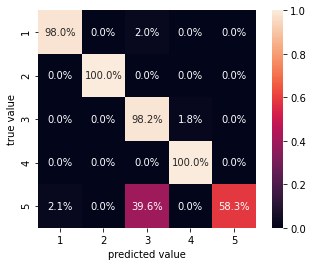

In [136]:
Classify_confusion_matrix(gesture_validation,0.6,0.5,5,5)

In [116]:
def Detect_ROC(Gesture,iou_threshold) -> float:
    y_true = list()
    y_pred = list()
    for test_data in Gesture.predict_data:
        hit_count = 0
        for data in test_data:
            if data['is_gesture']:
                if data['iou'] > iou_threshold:
                    y_true.append(1)
                else:
                    y_true.append(0)
                y_pred.append(data['hm_max_value'])
            else:
                y_true.append(0)
                y_pred.append(data['hm_max_value'])

    print(y_true)
    print(y_pred)
    print(len(y_true),y_true.count(1),y_true.count(0))

    print(len(y_pred),y_pred.count(0))
    fpr, tpr, thresholds = roc_curve(y_true,y_pred)

    print(fpr, tpr)
    print(thresholds)
    print(np.argmax(tpr-fpr))

    optimal_idx = np.argmax(tpr-fpr)
    print(tpr[optimal_idx],fpr[optimal_idx])
    optimal_threshold = thresholds[optimal_idx]
    print(f"optimal_threshold : {optimal_threshold}")
    auc1 = auc(fpr, tpr)
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc1)
    plt.legend(loc = 'lower right')
    plt.text(0.6,0.2,"optimal_threshold : {:0.2f}".format(optimal_threshold))
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()   
    return optimal_threshold